<a href="https://colab.research.google.com/github/logregteam/Lead-Scoring---Logistic-Regression/blob/main/Lead_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEAD SCORING**


---

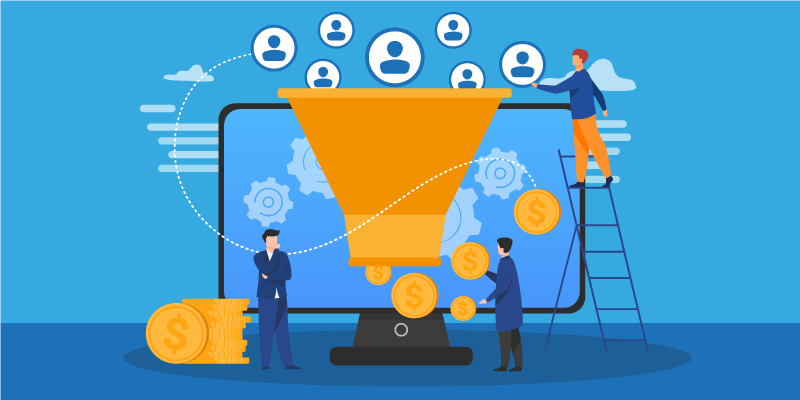


# **1. Setting up the workspace**


---




We import all the necessary libraries, set up the view and perform some initial tasks here, which allow us to move ahead with our study of the dataset.

### 1.1 Importing necessary libraries and setting up views

In [ ]:
#importing necesaary  libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.model_selection import train_test_split
from statsmodels.stats.weightstats import ztest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [ ]:
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# setting the view to display all our features
pd.set_option('display.max_columns', 100)

### 1.2 Reading in the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading in our data
data = pd.read_csv("/content/drive/MyDrive/hackathon dataset/Lead Scoring.csv")


### 1.3 Train-Test split
The target variable we have is "Converted" which represents whether the lead is converted or not, so we will separate it from the rest of our data frame, then we will split our data into train and test to avoid information leakage from train to test data.

**Data Leakage** is the scenario where the Machine Learning Model is already aware of some part of test data after training.This causes the problem of overfitting.


In [ ]:
X=data.drop(['Converted'],axis=1)
Y=data['Converted']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,train_size=0.7, random_state=100)

# **2.Data at a glance**

---



In this section we will perfom some initial inspections on our training dataset to form an idea of our predictors/input variables.
We will also be looking at the **DESCRIPTIVE STATISTICS** of our numerical variables and try to have an approximate idea about their distributions, their symmetricity or skewness, whatever maybe the case.


### 2.1   Data Dimensions








In [ ]:
# Data dimensions:
m,n = X_train.shape
print(f"Number of training examples: {m}")
print(f"Number of input variables: {n}")
print(f"Total size: {m*n}")

Number of training examples: 6468
Number of input variables: 36
Total size: 232848


### 2.2 Inspecting the first few and last few rows
- To get a sense of the datset it is always beneficial to inspect a few rows so that we get familiar with our input variables and the range of values that it takes.
- It helps in further analysis and cleaning of the dataset.

In [ ]:
#inspecting the first 5 rows
X_train.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1871,f3af2d98-02db-45d7-bbf6-c641d6b4f4c3,641410,API,Olark Chat,No,No,0.0,0,0.00,Email Opened,NaN,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,597687,Landing Page Submission,Direct Traffic,No,No,4.0,487,1.33,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Other Cities,NaN,NaN,NaN,NaN,No,Yes,Email Opened
3516,db308a34-ade6-4f0d-9779-586c5be188c7,626825,API,Olark Chat,No,No,5.0,106,2.50,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,NaN,NaN,NaN,NaN,No,No,Email Opened
8105,1199b37d-f610-4bb8-bf18-15267dec61fa,587928,Landing Page Submission,Google,No,No,5.0,1230,5.00,SMS Sent,India,Services Excellence,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,14.0,15.0,No,No,SMS Sent
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,622366,API,Olark Chat,No,No,0.0,0,0.00,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,NaN,NaN,NaN,NaN,No,No,Modified


In [ ]:
X_train.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
350,fbd84c6c-3485-4d52-a00f-65f6510e92e0,656685,Lead Add Form,Google,No,No,0.0,0,0.0,Email Opened,NaN,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Lateral Student,Thane & Outskirts,02.Medium,01.High,15.0,18.0,No,No,Email Opened
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,NaN,705,NaN,NaN,NaN,Hospitality Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,14.0,16.0,No,No,Modified
8039,a50edd80-9d99-4ac6-b6ce-4883afb97400,588165,API,Olark Chat,No,No,0.0,0,0.0,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
6936,2154ccbd-41f9-46f0-9edb-308cde9fc52d,596447,Landing Page Submission,Google,No,No,2.0,238,2.0,Converted to Lead,India,Travel and Tourism,Multiple Sources,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Graduation in progress,Might be,No,No,Select,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
5640,f3f7f8b4-b3d6-4535-b63e-54c72e7dd9f4,606685,API,Olark Chat,No,No,0.0,0,0.0,Email Opened,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified


We can clearly see that 'Select' appears in a lot of our categorical variables, the reason seems to be that the field was optional to fill and hence the user ended up not selecting anything, we will simply treat those as null/unknown values.

In [ ]:
X_train.replace("Select", np.nan, inplace=True)

### 2.3 Descriptive Statistics
Descriptive statistics are brief informational coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of a population. Descriptive statistics are broken down into measures of central tendency and measures of variability (spread). Measures of central tendency include the mean, median, and mode, while measures of variability include standard deviation, variance, minimum and maximum variables, kurtosis, and skewness.

In [ ]:
X_train.describe()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,6468.000000,6369.000000,6468.000000,6369.000000,3493.000000,3493.000000
mean,617186.001546,3.474957,483.875850,2.353143,14.316061,16.361294
std,23372.003514,5.323608,546.565663,2.179257,1.388163,1.815995
min,579533.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596516.250000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615720.500000,3.000000,246.000000,2.000000,14.000000,16.000000
75%,637348.750000,5.000000,926.500000,3.000000,15.000000,18.000000
max,660728.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Observations:
1. We will drop the lead number column as it is merely for identification and plays no role whatsoever in our analysis.
2. **Total Visits** - Although the mean and median lie pretty close to each other, the highest number of visits (mode) is pretty high, an initial inference is that the distribution might be skewed, we will explore the distribution soon.
3. **Total Time Spent on Website** - The mean, median as well as the mode are pretty different from each other, another possible case of skewed distribution, we shall explore its distribution soon.
A high value of Standard deviation gives us an idea of the wide range of values this variable might take.
4. **Page views Per visit** -


### 2.4 Data types of Features/ Input Variables

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    6468 non-null   object 
 1   Lead Number                                    6468 non-null   int64  
 2   Lead Origin                                    6468 non-null   object 
 3   Lead Source                                    6441 non-null   object 
 4   Do Not Email                                   6468 non-null   object 
 5   Do Not Call                                    6468 non-null   object 
 6   TotalVisits                                    6369 non-null   float64
 7   Total Time Spent on Website                    6468 non-null   int64  
 8   Page Views Per Visit                           6369 non-null   float64
 9   Last Activity                                  63

# **3. Data Cleaning**


---






### 3.1 Numerical and Categorical features

In [ ]:
# function to categorize the input variables present, into - 1) Numerical 2) Categorical
def column_categorizer(data):
  numerical_f=[feature for feature in data.columns if data[feature].dtype=='int64' or data[feature].dtype=='float64' ]
  categorical_f=[feature for feature in data.columns if data[feature].dtype== 'object']
  return numerical_f,categorical_f

In [ ]:
numerical_features, categorical_features= column_categorizer(X_train) #calling the function on training data

In [ ]:
print(f'NUMERICAL FEATURES :{numerical_features} \n\nCATEGORICAL FEATURES :{categorical_features}') #displaying the results

NUMERICAL FEATURES :['Lead Number', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'] 

CATEGORICAL FEATURES :['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


### 3.2 Null Values per column

In [ ]:
null_values_count =X_train.isnull().sum()
null_values_perc = null_values_count*100/m

In [ ]:
# arranging the count and percentage of null values in form of a dataframe
null_value_ =pd.concat([null_values_count, null_values_perc],axis=1)
null_value_.reset_index(inplace=True)
null_value_.columns=['Input Variable','Count of null values','Percentage of null values']
null_value_.sort_values(by=['Percentage of null values'],ascending=False) # sorting in descending order

,Input Variable,Count of null values,Percentage of null values
12,How did you hear about X Education,5054,78.138528
27,Lead Profile,4807,74.319728
24,Lead Quality,3367,52.056277
29,Asymmetrique Activity Index,2975,45.995671
32,Asymmetrique Profile Score,2975,45.995671
30,Asymmetrique Profile Index,2975,45.995671
31,Asymmetrique Activity Score,2975,45.995671
28,City,2587,39.996908
11,Specialization,2377,36.750155
23,Tags,2346,36.270872


### 3.3 Null values - Overview

We saw that a lot of features have missing values, lets analyze them further.

In [ ]:
#define a function which takes a dataframe as input and returns the list of features which have atleast 1 null value present.
def null_features(data):
  nF=[]
  for col in data.columns:
    count = data[col].isnull().sum()
    if count>0:
      nF.append(col)
  return nF


#### 3.3.1 Null Values - Categorical features

In [ ]:
null_features_c=null_features(X_train[categorical_features])   #looking at the categorical features with null values

In [ ]:
#We create a list to store the columns we will probably drop before moving ahead with our analysis.
cols_to_drop_cat=[]

In [ ]:
# displaying the results
null_features_c = pd.Series(null_features_c)
print(null_features_c)

0                                       Lead Source
1                                     Last Activity
2                                           Country
3                                    Specialization
4                How did you hear about X Education
5                   What is your current occupation
6     What matters most to you in choosing a course
7                                              Tags
8                                      Lead Quality
9                                      Lead Profile
10                                             City
11                      Asymmetrique Activity Index
12                       Asymmetrique Profile Index
dtype: object


Let us explore these features a little.

In [ ]:
# displaying the unique vlaues of each categorical feature with null values
for feature in null_features_c:
  val=X_train[feature].unique()
  n_val=X_train[feature].nunique()
  print(f"Feature '{feature}' has [{n_val}] unique values.\n-------------------------------------\n List of unique values : {val}")
  print("\n")

Feature 'Lead Source' has [20] unique values.
-------------------------------------
 List of unique values : ['Olark Chat' 'Direct Traffic' 'Google' 'Organic Search' 'Reference'
 'Referral Sites' 'Welingak Website' 'Facebook' nan 'welearnblog_Home'
 'bing' 'Click2call' 'google' 'Press_Release' 'Live Chat' 'Social Media'
 'youtubechannel' 'WeLearn' 'Pay per Click Ads' 'NC_EDM' 'blog']


Feature 'Last Activity' has [17] unique values.
-------------------------------------
 List of unique values : ['Email Opened' 'SMS Sent' 'Had a Phone Conversation' 'Converted to Lead'
 'Email Bounced' 'Unsubscribed' 'Email Link Clicked'
 'Olark Chat Conversation' 'Form Submitted on Website'
 'Page Visited on Website' 'View in browser link Clicked' 'Unreachable'
 nan 'Approached upfront' 'Resubscribed to emails' 'Email Received'
 'Visited Booth in Tradeshow' 'Email Marked Spam']


Feature 'Country' has [33] unique values.
-------------------------------------
 List of unique values : [nan 'India' 'United

##### Observations:
- '**How did you hear about X education?'** has the highest amount of null values, it might be an optional field to fill in the details form on the company's website and hence most people tend to skip this question. In all it has 8 unique values. We will drop this variable.

- **'Lead Profile'** - is assigned to a customer after getting in touch with them and has approximately 74% NULL values, this variable can be kept aside as it is not prior information but rather post-contact information.

- **'Lead quality'** - Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. It also has high percentage of null values and is post-contact information, hence can be set aside for further analysis.

- **'Tags'** - has 25 unique values and is also a post-contact feature which contains information based on the conversation with the sales person, hence it will also not be available for model building.

**> Asymmetrique** -  Asymmetrique is a marketing agency offering brand solutions to a range of clients across different industries.

- **'Asymmetrique Profile Index'** - An index assigned to each customer based on their profile. It has approximately 45% null values and 3 unique values- Medium, High, Low. After some research we came to know that these indexes are assigned by an organisation named "Asymmetrique" which is a marketing agency, to each lead based on their own algorithm.
- **'Asymmetrique Activity Index'** -  An index assigned to each customer based on their index.



In [ ]:
null_features_n=null_features(X_train[numerical_features])   #looking at the numerical features with null values

In [ ]:
cols_to_drop_cat.append('How did you hear about X Education')

Let us look in more depth to get a clear view.

##### **3.3.1.1 City**


---



City has 39.6% null values, which is quite high. It has 6 unique values, most of which are related to India. Let's explore this variable a little.

In [ ]:
sns.set_style("dark")

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Cities'),
  Text(3, 0, 'Other Cities of Maharashtra'),
  Text(4, 0, 'Other Metro Cities'),
  Text(5, 0, 'Tier II Cities')])

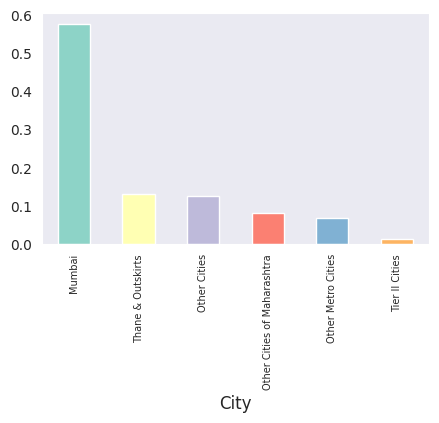

In [ ]:
 #lets count the frequency of these unique values
X_train['City'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette("Set3",6), figsize=(5,3))
plt.xlabel("City", fontsize=12)
plt.xticks(fontsize=7)

Although our data has a lot of countries in it, when it comes to cities there is no clear information in the data we have. It is vaguely classified, and 3 categories out of 6 pertain to Mahrashtra, India only.
Let us examine the relationship between City and Country for a clear picture.

In [ ]:
X_train.groupby(by=['Country','City']).count()['Prospect ID']

Country        City                       
Australia      Mumbai                         5
               Other Cities                   2
               Thane & Outskirts              1
Bahrain        Mumbai                         1
               Other Cities                   2
                                             ..
United States  Other Cities                   6
               Other Cities of Maharashtra    4
               Other Metro Cities             2
               Thane & Outskirts              3
Vietnam        Mumbai                         1
Name: Prospect ID, Length: 73, dtype: int64

These values are a bit off, because we have 4 people in the intersection of Australia and Mumbai, which is not possible.
If you see other countries as well, the numbers do not seem to conform to logic, there might be some problem with how they are recorded or anything of that sort. Let us just look at "Australia" for instance.

In [ ]:
cols_to_drop_cat.append('City')

In [ ]:
X_train[X_train['Country']=='Australia'].loc[:,['City','Country']].head(8)

,City,Country
5171,Thane & Outskirts,Australia
9061,Mumbai,Australia
6731,Mumbai,Australia
4566,Mumbai,Australia
8967,Other Cities,Australia
3071,Other Cities,Australia
6643,NaN,Australia
7210,Mumbai,Australia


##### **3.3.1.2 Specialization**


---



---


Specialization has 36% null values and has 17 unique values

In [ ]:
X_train['Specialization'].value_counts(normalize='True')

Finance Management                   0.166707
Marketing Management                 0.147641
Human Resource Management            0.144952
Operations Management                0.090442
Business Administration              0.068932
Supply Chain Management              0.059399
IT Projects Management               0.058910
Banking, Investment And Insurance    0.055488
Travel and Tourism                   0.033733
Media and Advertising                0.032510
International Business               0.029577
Healthcare Management                0.024688
Hospitality Management               0.021266
E-COMMERCE                           0.020533
Retail Management                    0.017111
Rural and Agribusiness               0.011489
E-Business                           0.009044
Services Excellence                  0.007578
Name: Specialization, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Finance Management'),
  Text(1, 0, 'Marketing Management'),
  Text(2, 0, 'Human Resource Management'),
  Text(3, 0, 'Operations Management'),
  Text(4, 0, 'Business Administration'),
  Text(5, 0, 'Supply Chain Management'),
  Text(6, 0, 'IT Projects Management'),
  Text(7, 0, 'Banking, Investment And Insurance'),
  Text(8, 0, 'Travel and Tourism'),
  Text(9, 0, 'Media and Advertising'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'Healthcare Management'),
  Text(12, 0, 'Hospitality Management'),
  Text(13, 0, 'E-COMMERCE'),
  Text(14, 0, 'Retail Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'E-Business'),
  Text(17, 0, 'Services Excellence')])

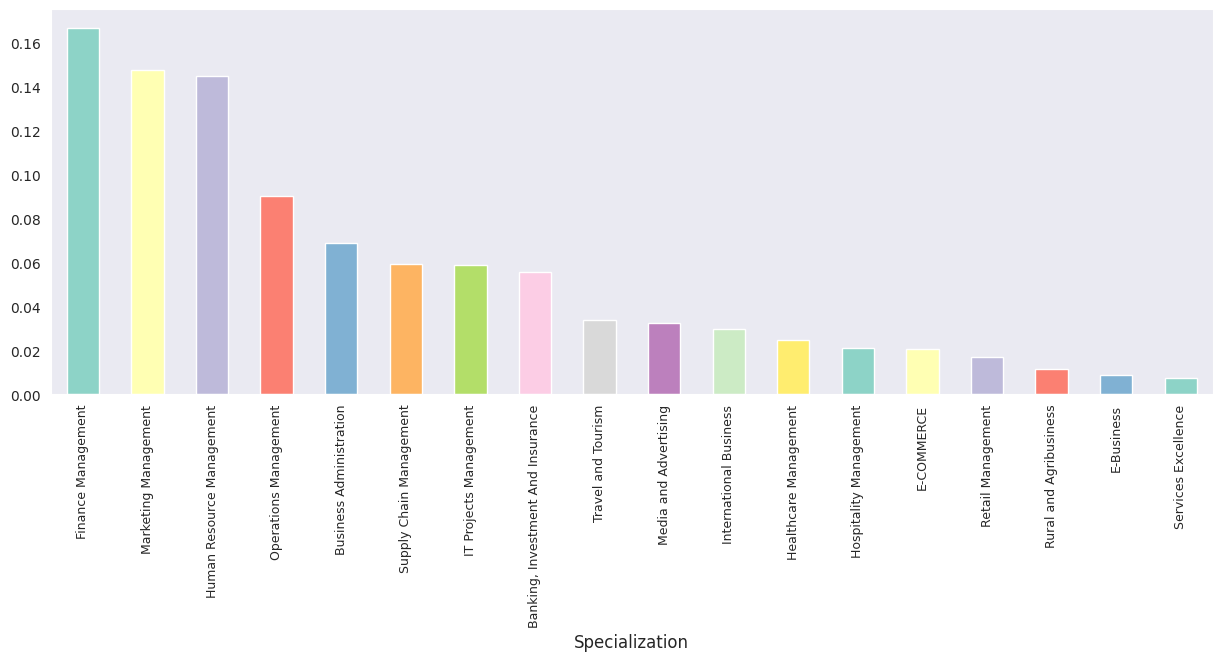

In [ ]:

X_train['Specialization'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette("Set3",17),figsize=(15,5))
plt.xlabel('Specialization',fontsize=12)
plt.xticks(fontsize=9)


Here 'Finance Mangement' is our top category. Lets us see the percent conversion under this category.

In [ ]:
mask = X_train['Specialization']=='Finance Management'

num=pd.concat([X_train,Y_train],axis=1)[mask]['Converted'].sum()
den=pd.concat([X_train,Y_train],axis=1)[mask]['Converted'].count()
prop=num/den
print("% conversions Under finance management:\t", prop*100)


% conversions Under finance management:	 46.33431085043988


Let us now see the change if we impute the missing values using mode.



In [ ]:
new = X_train['Specialization'].fillna("Finance Management")
new

1871       Marketing Management
6795         Finance Management
3516         Finance Management
8105        Services Excellence
3934         Finance Management
                 ...           
350     Supply Chain Management
79       Hospitality Management
8039         Finance Management
6936         Travel and Tourism
5640         Finance Management
Name: Specialization, Length: 6468, dtype: object

In [ ]:
new = X_train['Specialization'].fillna("Finance Management")
mask= (new =='Finance Management')
num=pd.concat([new,Y_train],axis=1)[mask]['Converted'].sum()
den=pd.concat([new,Y_train],axis=1)[mask]['Converted'].count()
prop=num/den
print("% conversions Under finance management:\t", prop*100)

% conversions Under finance management:	 32.33082706766917


We see a drastic fall in the percent conversions when we use mode Imputation here, the number of values missing are too large that it affects the distribution of output variable.

A null value for Specialization might mean that the customer hasn't filled up that field, that is they might not have worked in the industry before and are preparing themselves for it or it might be just that their field of work is something else than what's available in the dropdown(possibly).
The rule of thumb is to create a new category called "Unknown" to replace the missing values.

In [ ]:
X_train['Specialization'].replace(np.NaN,"Unknown",inplace=True)

##### **3.3.1.3 What matters most to you in choosing a course**


---




It has approximately 29% null values and has [3] unique values.

 List of unique values : ['Better Career Prospects' 'Flexibility & Convenience' 'Other']

 Let us see the frequency of these responses.

In [ ]:
X_train['What matters most to you in choosing a course'].value_counts(normalize='True')

Better Career Prospects      0.999342
Flexibility & Convenience    0.000438
Other                        0.000219
Name: What matters most to you in choosing a course, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

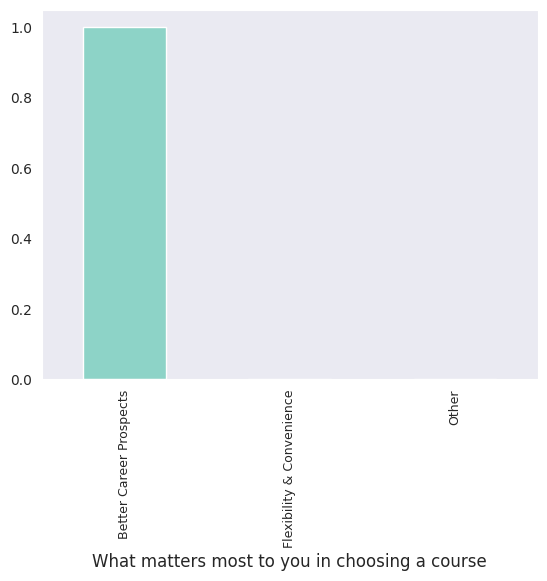

In [ ]:

X_train['What matters most to you in choosing a course'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette("Set3",17))
plt.xlabel('What matters most to you in choosing a course',fontsize=12)
plt.xticks(fontsize=9)


We have a highly skewed class distribution here, which also makes it less important in classifying lead as there is not enough variablility in the variable to be able to explain the lead conversion.


In [ ]:
cols_to_drop_cat.append('What matters most to you in choosing a course')

##### **3.3.1.4 What is your current occupation**


---




It has 28% null values and 6 major categories.

Let us explore the frequency of their occurence.

In [ ]:
X_train['What is your current occupation'].value_counts(normalize='True')*100

Unemployed              85.551913
Working Professional    10.972678
Student                  2.972678
Housewife                0.196721
Other                    0.174863
Businessman              0.131148
Name: What is your current occupation, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Working Professional'),
  Text(2, 0, 'Student'),
  Text(3, 0, 'Housewife'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Businessman')])

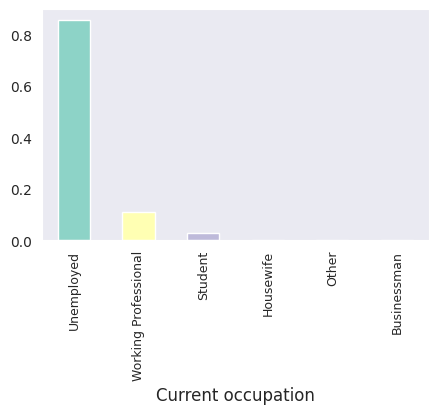

In [ ]:
X_train['What is your current occupation'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette("Set3",6),figsize=(5,3))
plt.xlabel('Current occupation',fontsize=12)
plt.xticks(fontsize=9)

This is also a skewed class distribution hence if we use the most frequent category for imputation this will become even more irrelevant. Therefore as a rule of thumb we will just impute the missing values as 'Missing'

In [ ]:
X_train['What is your current occupation'].replace(np.nan,'Missing',inplace=True)

In [ ]:
X_train['What is your current occupation'].value_counts(normalize='True')*100

Unemployed              60.513296
Missing                 29.267161
Working Professional     7.761286
Student                  2.102659
Housewife                0.139147
Other                    0.123686
Businessman              0.092764
Name: What is your current occupation, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Missing'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Housewife'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Businessman')])

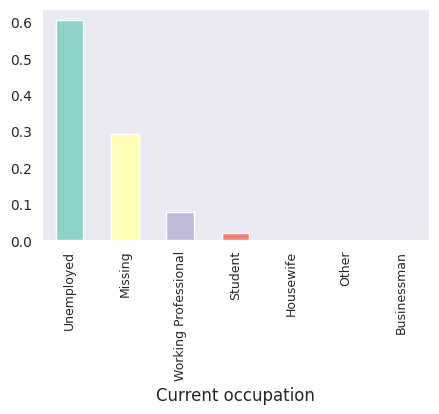

In [ ]:
X_train['What is your current occupation'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette("Set3",7),figsize=(5,3))
plt.xlabel('Current occupation',fontsize=12)
plt.xticks(fontsize=9)

##### **3.3.1.5 Country**
Feature 'Country' has [33] unique values and approximately 27% null values.

**List of unique values** : [nan 'India' 'United Arab Emirates' 'Saudi Arabia' 'Bahrain''South Africa' 'United States' 'Australia' 'Singapore' 'Philippines''France' 'Qatar' 'Hong Kong' 'Ghana' 'Sweden' 'Russia' 'Kuwait' 'unknown''Nigeria' 'Asia/Pacific Region' 'Uganda' 'Indonesia' 'Oman''United Kingdom' 'Canada' 'Germany' 'Malaysia' 'Bangladesh' 'China'
 'Belgium' 'Denmark' 'Netherlands' 'Kenya' 'Vietnam']

In [ ]:
X_train['Country'].value_counts(normalize='True')*100

India                   95.697110
United States            0.949167
United Arab Emirates     0.822611
Saudi Arabia             0.358574
Singapore                0.337482
Australia                0.189833
Qatar                    0.168741
United Kingdom           0.168741
Bahrain                  0.126556
Hong Kong                0.126556
unknown                  0.105463
France                   0.105463
Canada                   0.084370
South Africa             0.084370
Nigeria                  0.063278
Germany                  0.063278
Sweden                   0.042185
Philippines              0.042185
Asia/Pacific Region      0.042185
Uganda                   0.042185
Oman                     0.042185
Ghana                    0.042185
Kuwait                   0.042185
Netherlands              0.042185
China                    0.042185
Belgium                  0.021093
Kenya                    0.021093
Denmark                  0.021093
Russia                   0.021093
Bangladesh    

Approximately all of the data comes from India except a few records here and there thus there is no point in imputing the null values with mode as it will skew the data further. There is little to no variation in this feature.Hence, we will not use it for model building purpose.


In [ ]:
cols_to_drop_cat.append('Country')

##### **3.3.1.6 Lead Source**


---



Lead sources has negligible null values (approximately 0.4%).

**Feature 'Lead Source' has [20] unique values.**

 List of unique values : ['Olark Chat' 'Direct Traffic' 'Google' 'Organic Search' 'Reference'
 'Referral Sites' 'Welingak Website' 'Facebook' nan 'welearnblog_Home'
 'bing' 'Click2call' 'google' 'Press_Release' 'Live Chat' 'Social Media'
 'youtubechannel' 'WeLearn' 'Pay per Click Ads' 'NC_EDM' 'blog'].

 Let us analyze their frequency of ocurrence.



In [ ]:
X_train['Lead Source'].value_counts(normalize='True')*100

Google               31.718677
Direct Traffic       27.262847
Olark Chat           19.096414
Organic Search       12.156497
Reference             6.054960
Referral Sites        1.428350
Welingak Website      1.412824
Facebook              0.512343
google                0.077628
Click2call            0.046577
bing                  0.046577
Press_Release         0.031051
Live Chat             0.031051
Social Media          0.031051
welearnblog_Home      0.015526
youtubechannel        0.015526
WeLearn               0.015526
Pay per Click Ads     0.015526
NC_EDM                0.015526
blog                  0.015526
Name: Lead Source, dtype: float64

We can see here that the lead source is majorly distributed across Google, Direct Traffic Olark Chat, Organic search, reference and referral sites.We can safely replace the null values with Google here.
Before doing that we can see that-

1) We have **Google** and **google** as two separate categories, so let's combine those.

2) Some categories have little to no records in them, so let us club similar categories together.

In [ ]:
# clubbing Google and google together
X_train['Lead Source'].replace('google','Google',inplace=True)
# redundant categories-
#similar categories can be can be grouped together as one
# Youtube,Social media, Facebook - Social channels
X_train['Lead Source'].replace(['youtubechannel','Social Media','Facebook'],'Social channels', inplace= True)
# WeLearn and welearnblog_Home - as WeLearn
X_train['Lead Source'].replace(['welearnblog_Home','WeLearn'],'WeLearn', inplace=True)
# rest all as others
X_train['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','Pay per Click Ads','NC_EDM','blog'],'Others',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Google'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Olark Chat'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Referral Sites'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Social channels'),
  Text(8, 0, 'Others'),
  Text(9, 0, 'WeLearn')])

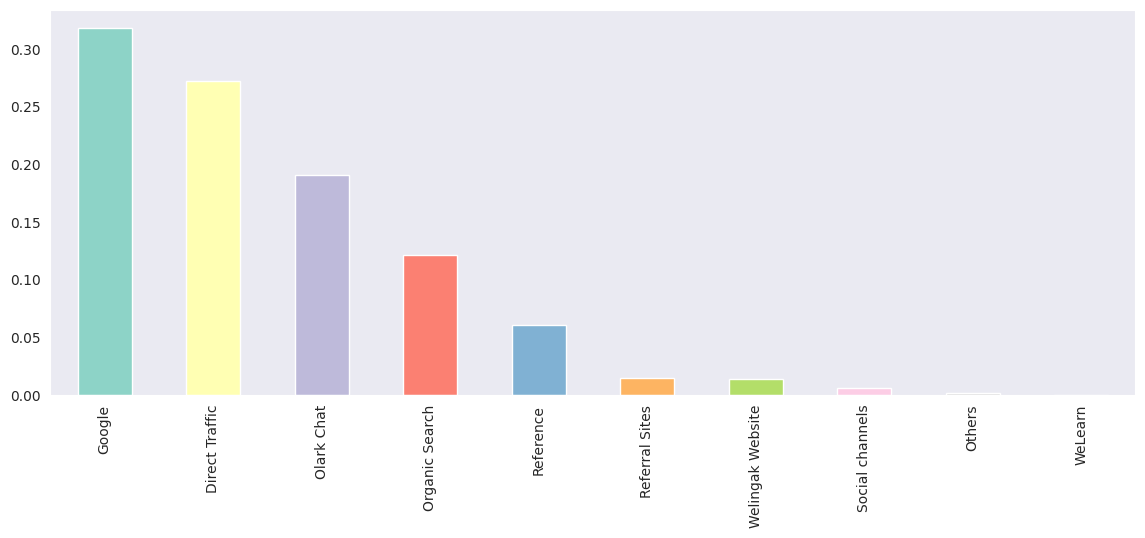

In [ ]:
X_train['Lead Source'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette('Set3'),figsize=(14,5))
plt.xticks(fontsize=10)

In [ ]:
X_train['Lead Source'].replace(np.nan,'Google',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Google'),
  Text(1, 0, 'Direct Traffic'),
  Text(2, 0, 'Olark Chat'),
  Text(3, 0, 'Organic Search'),
  Text(4, 0, 'Reference'),
  Text(5, 0, 'Referral Sites'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Social channels'),
  Text(8, 0, 'Others'),
  Text(9, 0, 'WeLearn')])

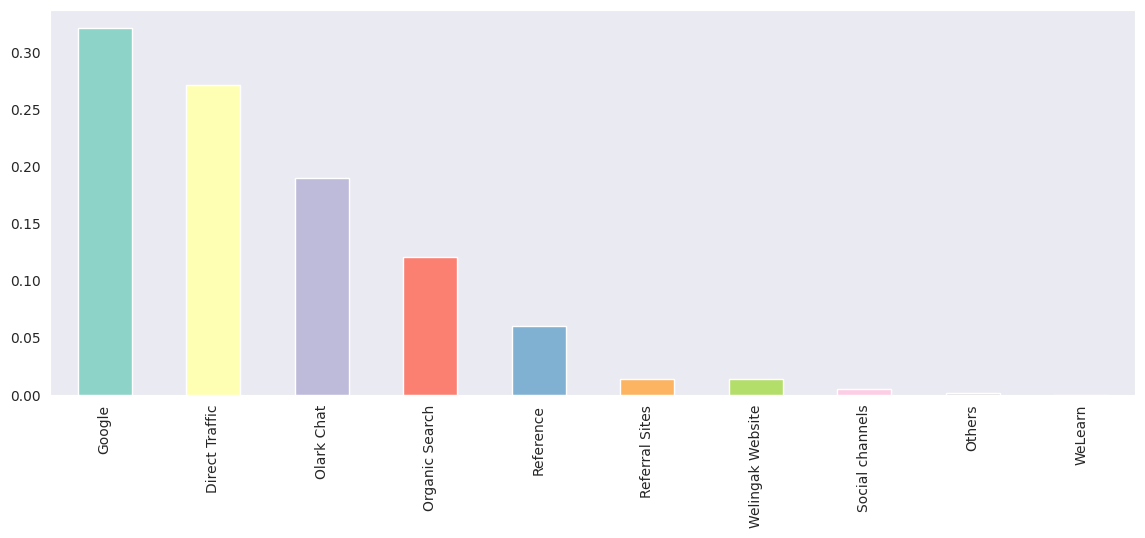

In [ ]:
X_train['Lead Source'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette('Set3'),figsize=(14,5))
plt.xticks(fontsize=10)

##### **3.3.1.7 Last Activity**


---





 It has aproximately 1% null values.

**Feature 'Last Activity' has [17] unique values.**

 List of unique values : ['Email Opened' 'SMS Sent' 'Had a Phone Conversation' 'Converted to Lead'
 'Email Bounced' 'Unsubscribed' 'Email Link Clicked'
 'Olark Chat Conversation' 'Form Submitted on Website'
 'Page Visited on Website' 'View in browser link Clicked' 'Unreachable'
 nan 'Approached upfront' 'Resubscribed to emails' 'Email Received'
 'Visited Booth in Tradeshow' 'Email Marked Spam']

Let us check their frequency of occurence.

In [ ]:
X_train['Last Activity'].value_counts(normalize='True')*100

Email Opened                    37.410072
SMS Sent                        30.387864
Olark Chat Conversation         10.337817
Page Visited on Website          7.288083
Converted to Lead                4.660619
Email Bounced                    3.675321
Email Link Clicked               2.862058
Form Submitted on Website        1.282452
Unreachable                      0.891461
Unsubscribed                     0.609947
Had a Phone Conversation         0.344073
Approached upfront               0.093838
View in browser link Clicked     0.078198
Email Received                   0.031279
Resubscribed to emails           0.015640
Visited Booth in Tradeshow       0.015640
Email Marked Spam                0.015640
Name: Last Activity, dtype: float64

Text(0.5, 0, 'Last Activity')

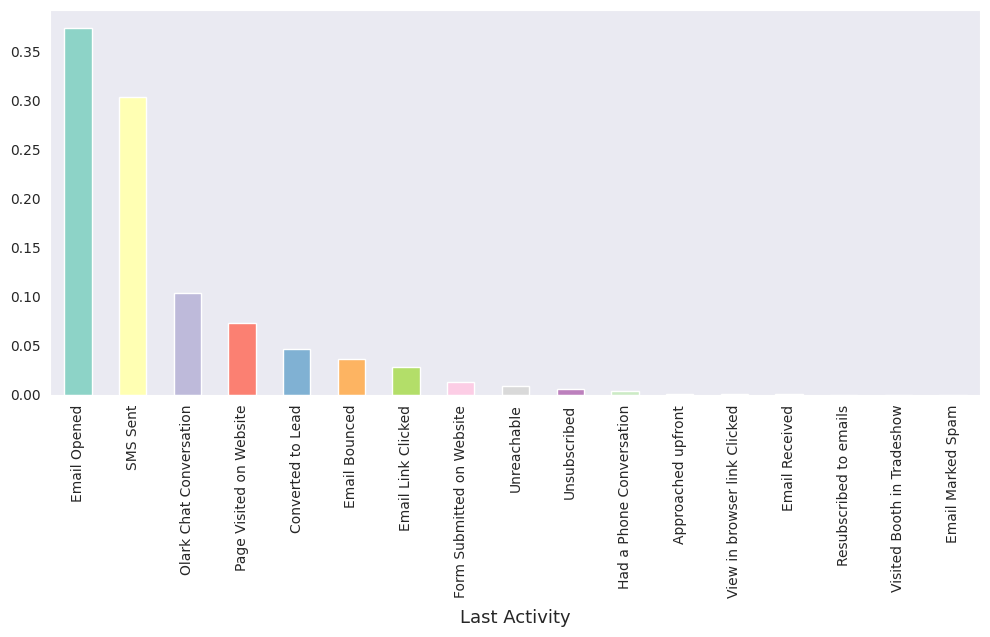

In [ ]:
X_train['Last Activity'].value_counts(normalize='True').plot(kind='bar',color=sns.color_palette('Set3'),figsize=(12,5))
plt.xticks(fontsize=10)
plt.xlabel('Last Activity',fontsize=13,labelpad=8)

We can clearly see that the last activity of a potential lead is majorly distributed across 7-8 categories so we can safely replace null values with the most frequent category, i.e. Email opened.

In [ ]:
X_train['Last Activity'].replace(np.nan,'Email Opened', inplace=True)

##### **3.3.1.8 Lead Profile**


---





In [ ]:
X_train['Lead Profile'].value_counts(normalize='True')*100

Potential Lead                 68.332330
Other Leads                    19.747140
Student of SomeSchool           9.933775
Dual Specialization Student     1.023480
Lateral Student                 0.963275
Name: Lead Profile, dtype: float64

<Axes: >

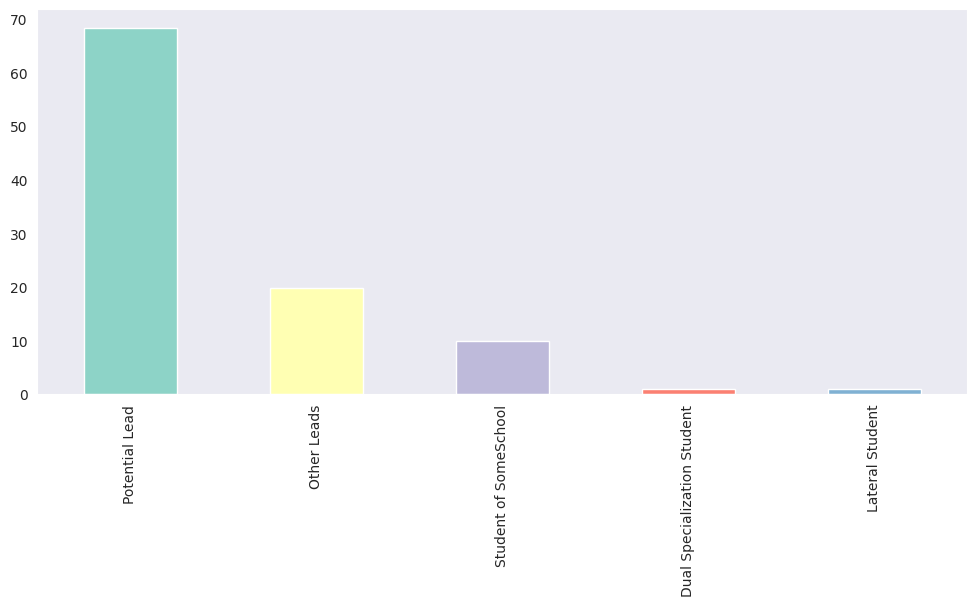

In [ ]:
(X_train['Lead Profile'].value_counts(normalize='True')*100).plot(kind='bar',color=sns.color_palette('Set3'),figsize=(12,5))

In [ ]:
cols_to_drop_cat.append('Lead Profile')

##### 3.3.1.9 Lead Quality

In [ ]:
X_train['Lead Quality'].value_counts(normalize='True')*100

Might be             35.117704
Not Sure             24.540471
High in Relevance    14.253467
Worst                13.350532
Low in Relevance     12.737827
Name: Lead Quality, dtype: float64

<Axes: >

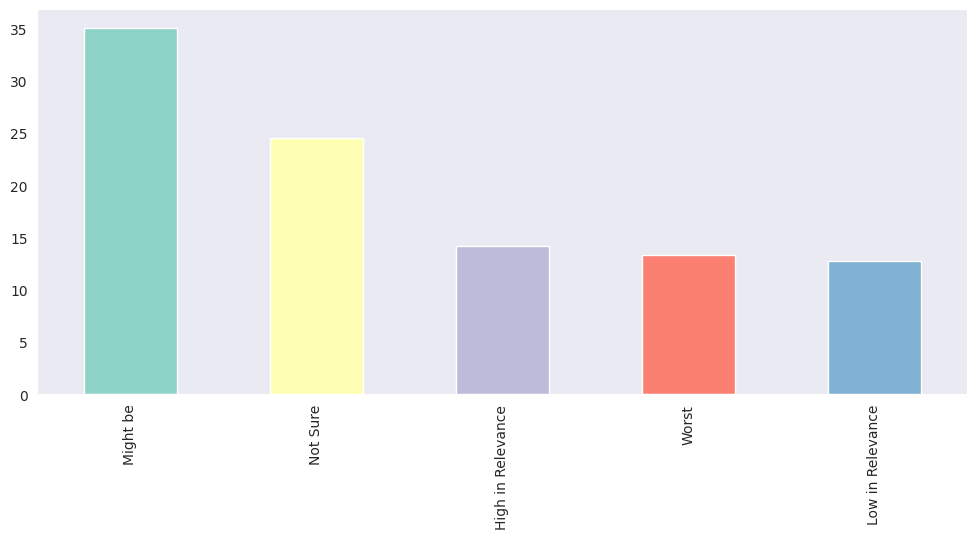

In [ ]:
(X_train['Lead Quality'].value_counts(normalize='True')*100).plot(kind='bar',color=sns.color_palette('Set3'),figsize=(12,5))

In [ ]:
cols_to_drop_cat.append('Lead Quality')

##### **3.3.1.10 Asymmetrique Profile Index**

An index assigned to each customer based on their profile. It has approximately 45% null values and 3 unique values- Medium, High, Low. After some research we came to know that these indexes are assigned by an organisation named "Asymmetrique" which is a marketing agency, to each lead based on their own algorithm.

Also since Asymmetrique profile and activity index has the same percentage of null values, it is highly possible that they are missing for the same records.

In [ ]:
#checking records where the values are absent.
X_train[X_train['Asymmetrique Profile Index'].isna()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6795,207aaf73-a121-41b8-96bb-b0d5c38e7a7b,597687,Landing Page Submission,Direct Traffic,No,No,4.0,487,1.33,Email Opened,India,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Cities,NaN,NaN,NaN,NaN,No,Yes,Email Opened
3516,db308a34-ade6-4f0d-9779-586c5be188c7,626825,API,Olark Chat,No,No,5.0,106,2.50,Email Opened,NaN,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
3934,6b2d3b2f-9990-449c-9333-012b578e39c8,622366,API,Olark Chat,No,No,0.0,0,0.00,Email Opened,NaN,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified
4844,5d421eb5-c831-45eb-8c63-c21027815c13,613574,Landing Page Submission,Direct Traffic,No,No,4.0,1502,2.00,SMS Sent,India,Business Administration,Online Search,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,SMS Sent
3297,9c7cd0cc-69f2-462f-81fd-4a6d41b27ae7,628456,Landing Page Submission,Organic Search,No,No,7.0,85,3.50,Email Opened,India,Rural and Agribusiness,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,Yes,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,c7cb9468-c96d-45cd-b232-732c2484b084,605469,Landing Page Submission,Direct Traffic,No,No,11.0,1478,2.75,SMS Sent,India,Supply Chain Management,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Busy,Not Sure,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,SMS Sent
4376,21c032a8-6ae6-49cf-8e75-a52be666d357,617802,API,Organic Search,No,No,2.0,579,1.00,Email Opened,India,Unknown,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Already a student,Worst,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
5646,3c96ac66-9bb2-4253-9ce3-e7d625cf1cdd,606663,Lead Add Form,Reference,No,No,0.0,0,0.00,Email Opened,NaN,Hospitality Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Other Leads,Mumbai,NaN,NaN,NaN,NaN,No,No,Email Opened
6936,2154ccbd-41f9-46f0-9edb-308cde9fc52d,596447,Landing Page Submission,Google,No,No,2.0,238,2.00,Converted to Lead,India,Travel and Tourism,Multiple Sources,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Graduation in progress,Might be,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified


An interesting thing to note is that here the Lead Origin is  API, Lead Add Form or Landing Page submission.

In [ ]:
  X_train[X_train['Asymmetrique Profile Index'].isna()]['Lead Origin'].value_counts()

Landing Page Submission    1640
API                        1088
Lead Add Form               247
Name: Lead Origin, dtype: int64

In [ ]:
X_train['Asymmetrique Profile Index'].value_counts(normalize=True)

02.Medium    0.553679
01.High      0.440309
03.Low       0.006012
Name: Asymmetrique Profile Index, dtype: float64

We cannot use mode to impute the missing values as,

1) 2 categories have almost similar frequencies.

2) The percentage of missing values is quite high, hence this method will only introduce unexpected anomalies.

We will drop this column as it already has a high percentage of null values and they cannot be imputed effectively. Also, it is third party information so there is no accurate information about this variable
as such.

In [ ]:
cols_to_drop_cat.append('Asymmetrique Profile Index')

##### **3.3.1.11 Asymmetrique Activity Index**
An index assigned to each customer based on their profile. It has approximately 45% null values and 3 unique values- Medium, High, Low.

In [ ]:
X_train['Asymmetrique Activity Index'].value_counts(normalize=True)


02.Medium    0.762096
01.High      0.165760
03.Low       0.072144
Name: Asymmetrique Activity Index, dtype: float64

Both these activity and profile indices are missing for the same records, hence it is possible that these values are not computed for these group of people at all.

We cannot use mode to impute the missing values as,

1) 2 categories have almost similar frequencies.

2) The percentage of missing values is quite high, hence this method will only introduce unexpected anomalies.

We will drop this column as it already has a high percentage of null values and they cannot be imputed effectively. Also, it is third party information so there is no accurate information as such.

In [ ]:
cols_to_drop_cat.append('Asymmetrique Activity Index')

#### 3.3.2 Numerical features
We have 2 numerical features with missing values, namely, total visits and page views per visit. They both have exactly same number of values missing. Let us see if they correspond to the exact same records (users) too.

In [ ]:
cols_to_drop_num=[]

In [ ]:
null_features_n = pd.Series(null_features_n)
print(null_features_n)

0                    TotalVisits
1           Page Views Per Visit
2    Asymmetrique Activity Score
3     Asymmetrique Profile Score
dtype: object


In [ ]:
X_train[X_train['Page Views Per Visit'].isnull()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
8071,6cd7f6d3-4781-436d-978d-7381106e4f2b,588051,Lead Add Form,Reference,No,No,NaN,341,NaN,Had a Phone Conversation,NaN,Business Administration,NaN,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Other Cities of Maharashtra,02.Medium,01.High,14.0,19.0,No,No,Modified
2130,a63844a8-e564-4370-b234-7ab45e07d564,639288,Lead Add Form,Reference,No,No,NaN,1413,NaN,Email Bounced,NaN,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,NaN,NaN,02.Medium,01.High,14.0,17.0,No,No,Modified
1136,498bb1e1-4e52-11e6-96be-22000aa8e760,647987,Lead Import,Social channels,No,No,NaN,238,NaN,Email Opened,NaN,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,Other Cities of Maharashtra,02.Medium,02.Medium,13.0,14.0,No,No,Modified
6556,1ffa344a-1c2b-440d-9101-43f167599691,599501,Lead Add Form,Reference,No,No,NaN,266,NaN,Email Opened,NaN,Supply Chain Management,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
3555,559625ff-3a83-42d4-86a2-63691caaf8df,626438,Lead Add Form,Reference,No,No,NaN,636,NaN,Email Opened,NaN,Human Resource Management,NaN,Housewife,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,Low in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,5b352d64-886d-471e-9339-cfd1b7f9207c,591536,Lead Add Form,Reference,No,No,NaN,1357,NaN,Email Opened,NaN,Marketing Management,NaN,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,NaN,02.Medium,01.High,14.0,19.0,No,No,Modified
470,99bc24d5-cd9c-4f70-a4b7-b2c5d3da56d7,655352,Lead Add Form,Reference,No,No,NaN,205,NaN,Email Opened,NaN,Finance Management,NaN,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Lateral Student,NaN,02.Medium,01.High,14.0,18.0,No,No,Modified
3428,5461778b-3604-4675-90f5-d997fe11bc29,627462,Lead Add Form,Reference,No,No,NaN,1447,NaN,Email Opened,NaN,Travel and Tourism,NaN,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,High in Relevance,No,No,Potential Lead,NaN,NaN,NaN,NaN,NaN,No,No,Modified
2921,ab5331cb-e85f-4782-931f-fb587eb2d1fd,631658,Lead Add Form,Reference,No,No,NaN,1055,NaN,Email Opened,NaN,Unknown,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Closed by Horizzon,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified


It is clear from the above table that the information is missing for the same users. Another interesting thing to note here is majority of them come from the Lead Add Form.
Which can mean that these group of people never actually visited the website but are rather identified as leads from a different source, a lead form in this case.
Therefore, their total visits as well as page views per visit must be equal to zero.

##### **3.3.2.1 Total Visits**
It has approximately 1.5% null values. Let us see its distribution.

In [ ]:
#descriptive Statistics
X_train['TotalVisits'].describe()

count    6369.000000
mean        3.474957
std         5.323608
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [ ]:

#mode
X_train['TotalVisits'].mode()

0    0.0
Name: TotalVisits, dtype: float64

Text(0.5, 0, 'Total Visits')

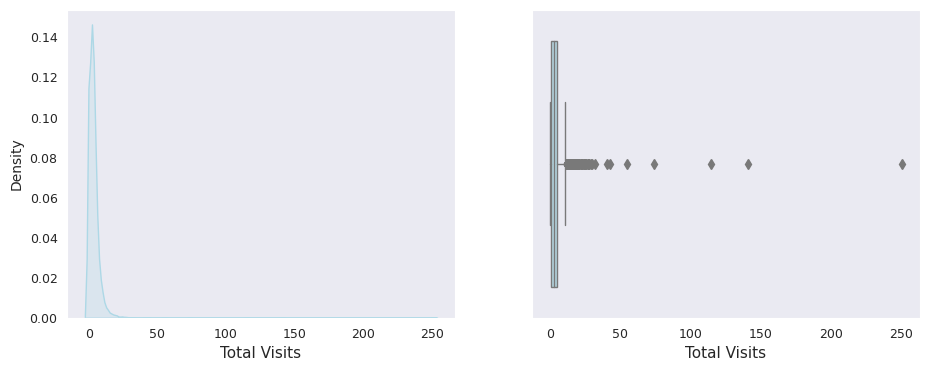

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
b=sns.kdeplot(X_train['TotalVisits'],shade=True,color='lightblue')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Total Visits',fontsize=11)
plt.subplot(1,2,2)
a=sns.boxplot(data= X_train,x='TotalVisits',color='lightblue',linewidth=1)
plt.xticks(fontsize=9)
a.set_xlabel('Total Visits',fontsize=11)


Let us see the distribution in the absence of null values.
We will simply plot only those values which are less than 1.5*IQR (inter quartile range)

[Text(0, 0.0, ''),
 Text(0, 200.0, ''),
 Text(0, 400.0, ''),
 Text(0, 600.0, ''),
 Text(0, 800.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1200.0, ''),
 Text(0, 1400.0, ''),
 Text(0, 1600.0, ''),
 Text(0, 1800.0, '')]

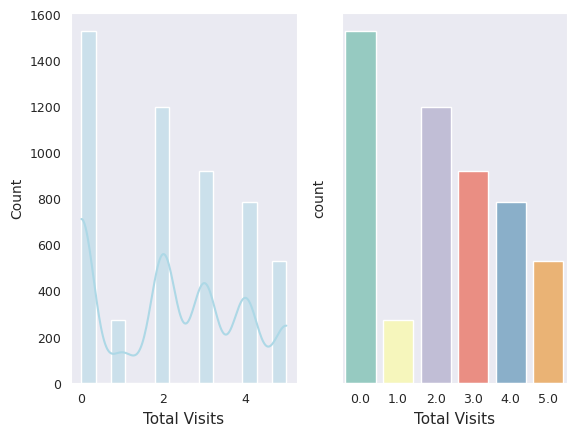

In [ ]:
Q1=X_train['TotalVisits'].describe()['25%']
Q3=X_train['TotalVisits'].describe()['75%']
IQR = Q3-Q1  #inter-quartile range
#now we will plot the distribution
values=[val for val in X_train['TotalVisits'].values if val<(1.5*IQR)] #according to the whiskers of the boxplot
plt.subplot(1,2,1)
b=sns.histplot(values,color='lightblue',kde=True)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Total Visits',fontsize=11)

#countplot
plt.subplot(1,2,2)
a=sns.countplot(x= values,palette='Set3')
plt.xticks(fontsize=9)
a.set_xlabel('Total Visits',fontsize=11)
a.set_yticklabels(labels=[])


A lot of records correspond to zero visits. Let us examine these.

Let us examine the state of Lead Origin where the total visits are zero.

In [ ]:
X_train[X_train['TotalVisits']==0]['Lead Origin'].value_counts()

API              1117
Lead Add Form     393
Lead Import        18
Name: Lead Origin, dtype: int64

The above analysis gives the idea that these leads are directly added and have not visited the website. It also tells us the the second most frequent category from where such visitors originate is -'Lead Add Form' which is exactly where our values are missing.

Due to the above analysis we will replace the null values by 0.

In [ ]:
X_train['TotalVisits'].fillna(0, inplace=True)

##### **3.3.2.2 Page Views Per Visit**
It has approximately 1.5% null values. Let us see its distribution.

Text(0.5, 0, 'Page Views Per Visit')

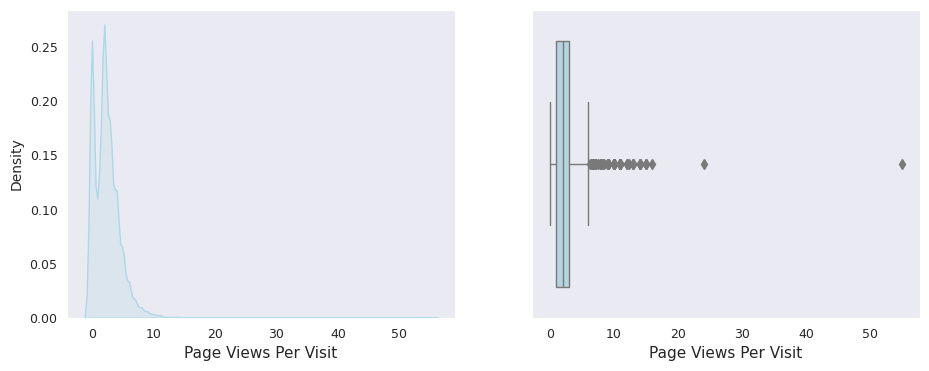

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
b=sns.kdeplot(X_train['Page Views Per Visit'],shade=True,color='lightblue')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Page Views Per Visit',fontsize=11)
plt.subplot(1,2,2)
a=sns.boxplot(data= X_train,x='Page Views Per Visit',linewidth=1,color='lightblue')
plt.xticks(fontsize=9)
a.set_xlabel('Page Views Per Visit',fontsize=11)

Text(0.5, 0, 'Page Views Per Visit')

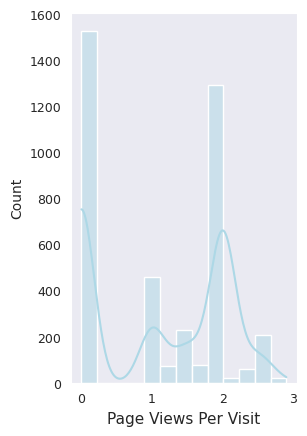

In [ ]:
Q1=X_train['Page Views Per Visit'].describe()['25%']
Q3=X_train['Page Views Per Visit'].describe()['75%']
IQR = Q3-Q1  #inter-quartile range
#now we will plot the distribution
values=[val for val in X_train['Page Views Per Visit'].values if val<(1.5*IQR)] #according to the whiskers of the boxplot
plt.subplot(1,2,1)
b=sns.histplot(values,color='lightblue',kde=True)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Page Views Per Visit',fontsize=11)



Similar argument follows for Page views per Visit as for Total Visits. So we will impute the missing values with zero.

In [ ]:
X_train[X_train['Page Views Per Visit']==0]['Lead Origin'].value_counts()

API              1117
Lead Add Form     393
Lead Import        18
Name: Lead Origin, dtype: int64

In [ ]:
X_train['Page Views Per Visit'].fillna(0, inplace=True)

##### 3.3.2.3 **Asymmetrique Profile and Activity Score**
A score assigned to each customer based on their profile. It has approximately 45% null values.

In [ ]:
X_train['Asymmetrique Profile Score'].describe()

count    3493.000000
mean       16.361294
std         1.815995
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

Text(0.5, 0, 'Asymmetrique Profile Score')

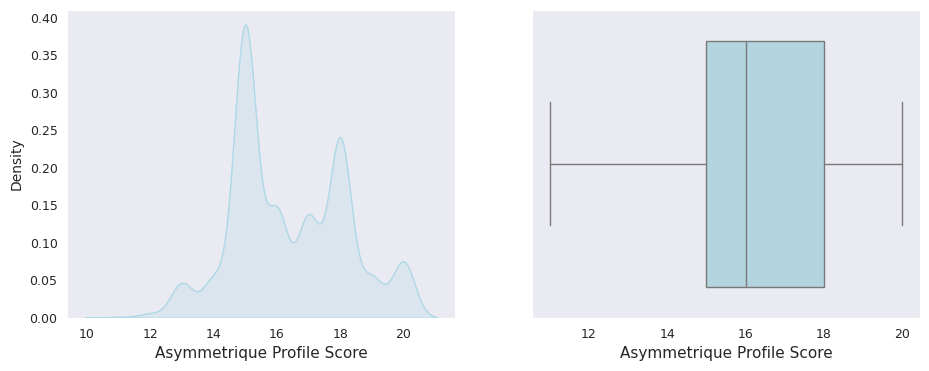

In [ ]:
#Asymmetrique profile score
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
b=sns.kdeplot(X_train['Asymmetrique Profile Score'],shade=True,color='lightblue')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Asymmetrique Profile Score',fontsize=11)
plt.subplot(1,2,2)
a=sns.boxplot(data= X_train,x='Asymmetrique Profile Score',linewidth=1,color='lightblue')
plt.xticks(fontsize=9)
a.set_xlabel('Asymmetrique Profile Score',fontsize=11)

In [ ]:
cols_to_drop_num.append('Asymmetrique Profile Score')

Text(0.5, 0, 'Asymmetrique Activity Score')

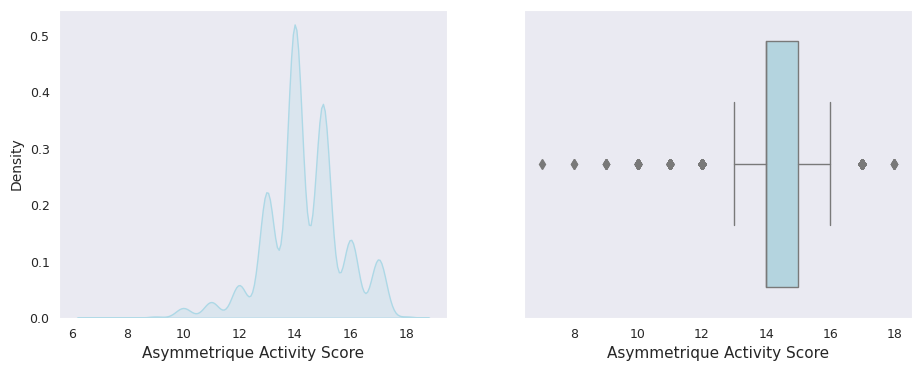

In [ ]:
#Asymmetrique activity score
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
b=sns.kdeplot(X_train['Asymmetrique Activity Score'],shade=True,color='lightblue')
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
b.set_xlabel('Asymmetrique Activity Score',fontsize=11)
plt.subplot(1,2,2)
a=sns.boxplot(data= X_train,x='Asymmetrique Activity Score',linewidth=1,color='lightblue')
plt.xticks(fontsize=9)
a.set_xlabel('Asymmetrique Activity Score',fontsize=11)

In [ ]:
cols_to_drop_num.append('Asymmetrique Activity Score')

#### 3.3.3 Miscellaneous

At last we have Lead number and Prospect ID which are merely present for identification.

In [ ]:
if X_train['Prospect ID'].nunique()==m :
  print('No duplicte values in Prospect ID, hence no duplicate records.')
else:
  print('Presence of duplicate records detected')

No duplicte values in Prospect ID, hence no duplicate records.


In [ ]:
#now we can set this aside
cols_to_drop_cat.append('Prospect ID')


In [ ]:
cols_to_drop_cat.append('Tags')

In [ ]:
cols_to_drop_cat

['How did you hear about X Education',
 'City',
 'What matters most to you in choosing a course',
 'Country',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Prospect ID',
 'Tags']

same follows for lead number.

In [ ]:
cols_to_drop_num.append('Lead Number')

# **4. Exploratory Data Analysis**


---







We will first check the distribution of the target variable. **Converted is the target variable**, Indicating whether a lead has been successfully converted (1) or not (0).

In [ ]:
Y_train.value_counts()

0    4002
1    2466
Name: Converted, dtype: int64

In [ ]:
# here we check, how much converison has happened
converted = round(sum(data['Converted']) / len(data['Converted'])*100, 2)
print(converted,'%')

38.54 %


Thus nearly 39% of the leads were successfully converted. This can be depicted by the graph as follows

Text(0, 0.5, 'Count')

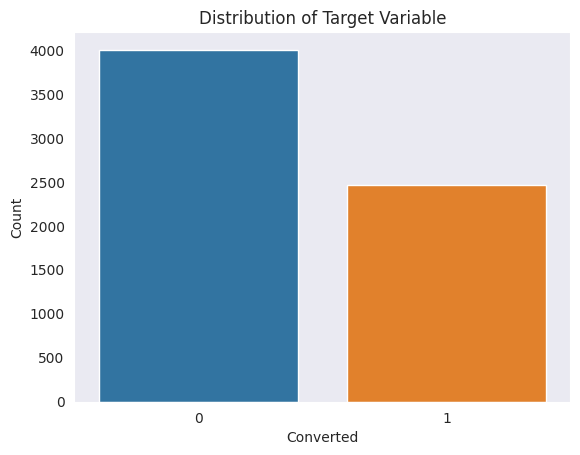

In [ ]:
sns.countplot(x=Y_train)
plt.title('Distribution of Target Variable')
plt.xlabel('Converted')
plt.ylabel('Count')


From the above graph, we observe that there is a significant class imbalance in the target variable.
The majority of the leads are not converted, while only a small percentage of leads have been converted. This class imbalance can potentially affect the performance of the model, and we may need to address this issue during model building.

###**4.1 Relation between categorical variables and the target variable**


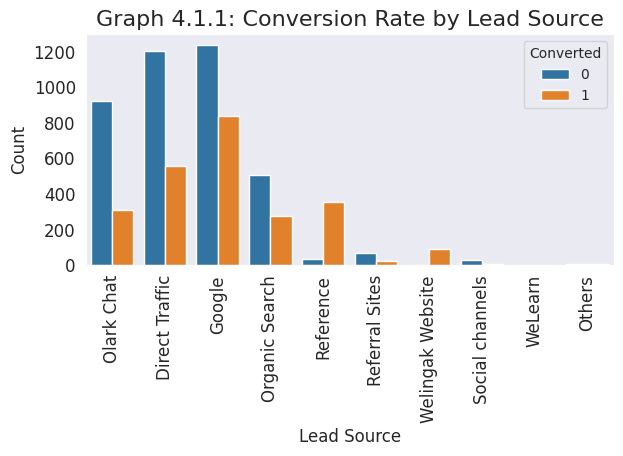

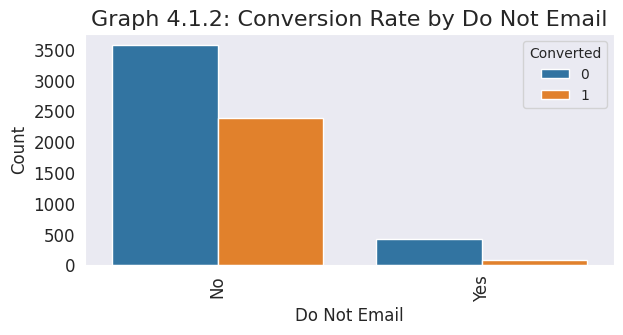

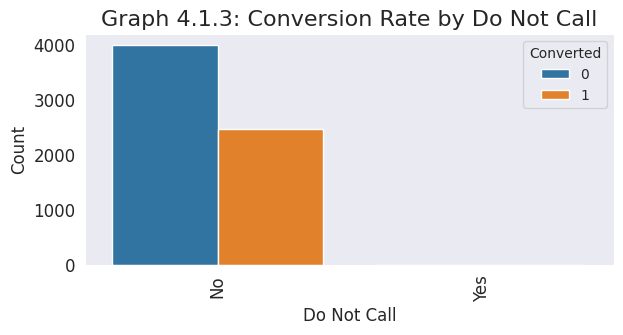

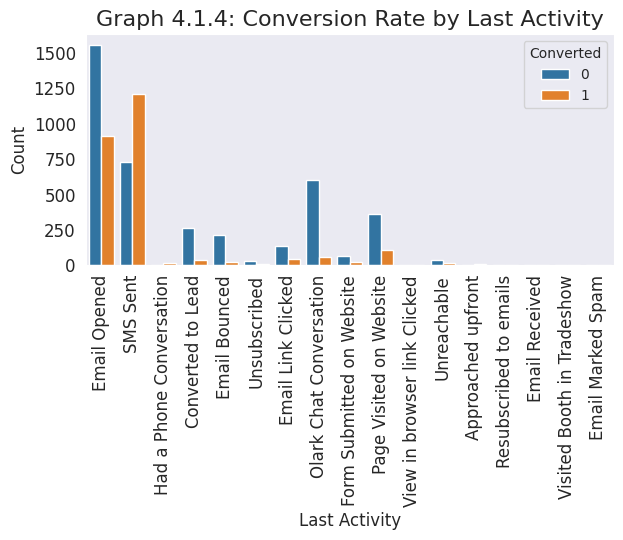

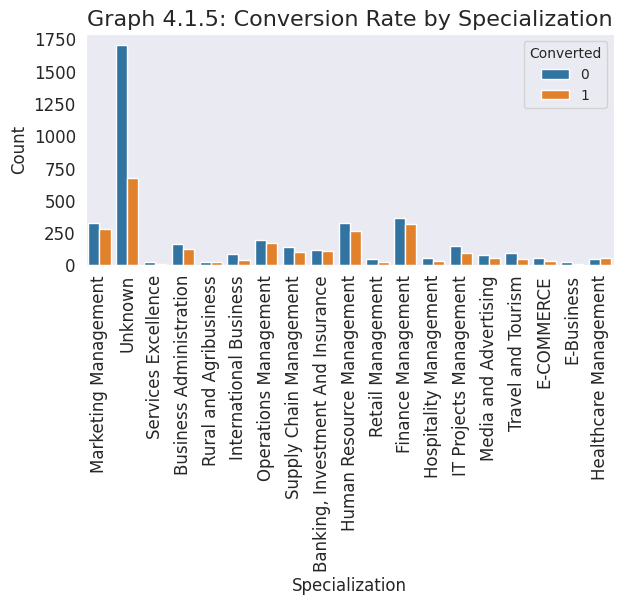

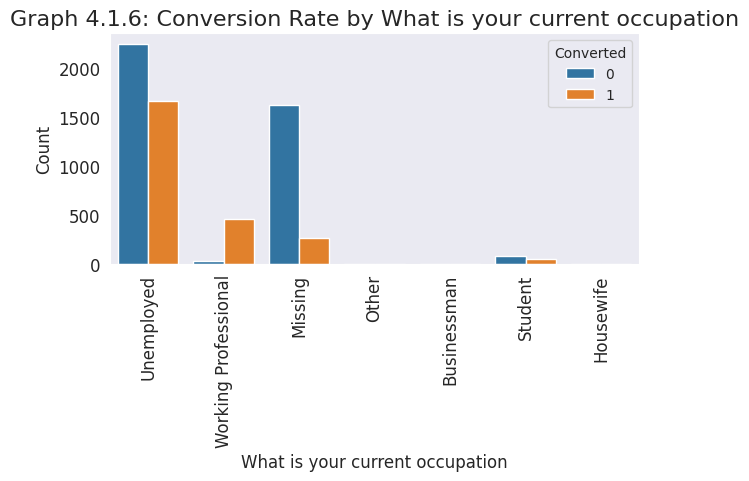

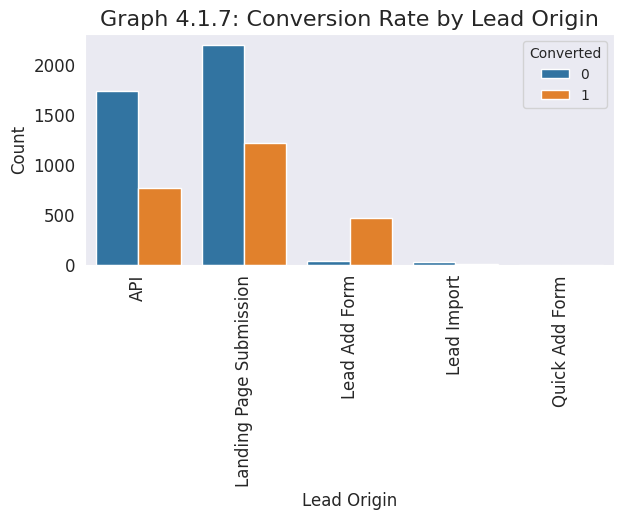

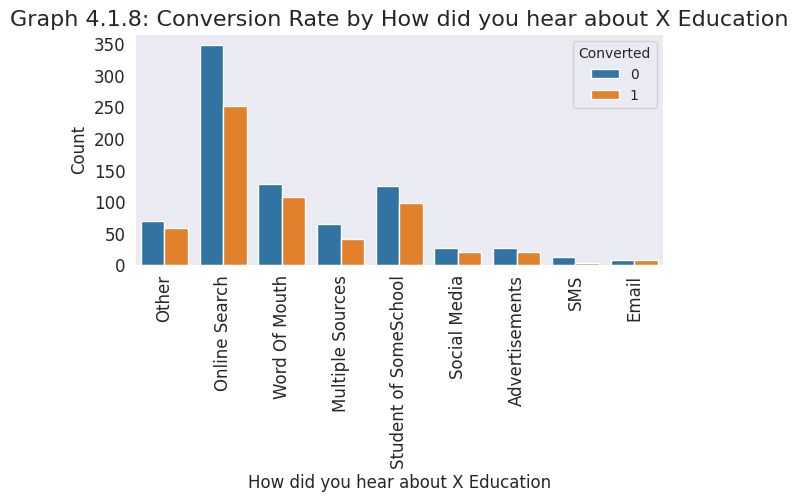

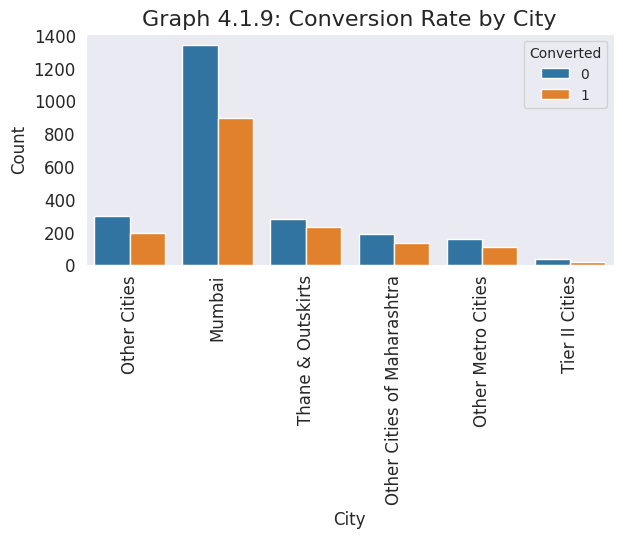

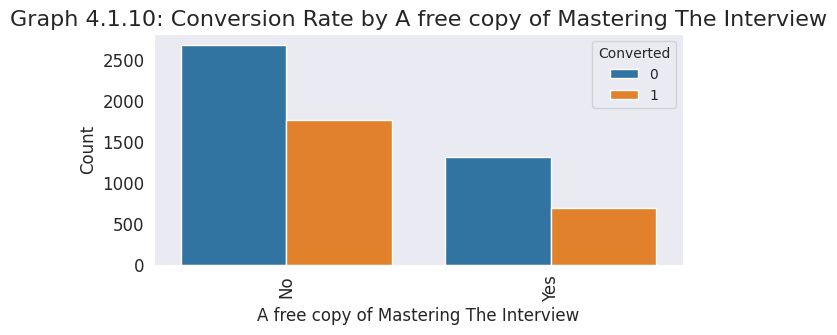

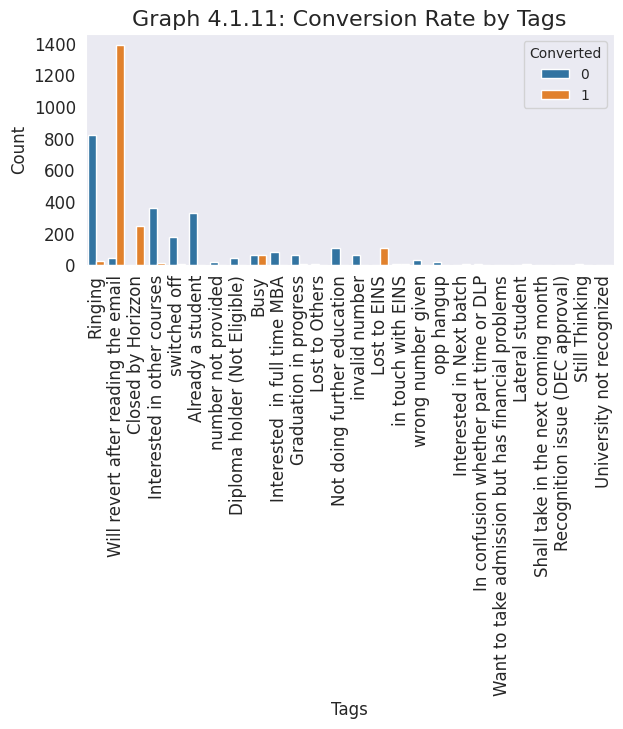

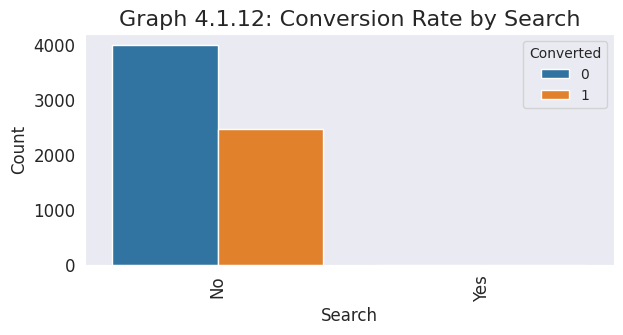

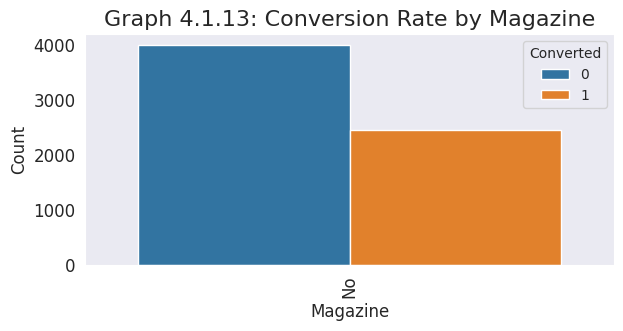

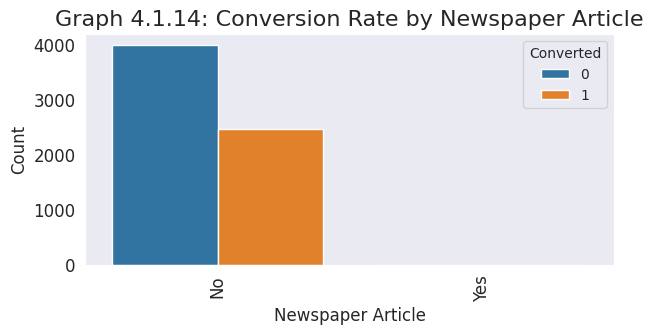

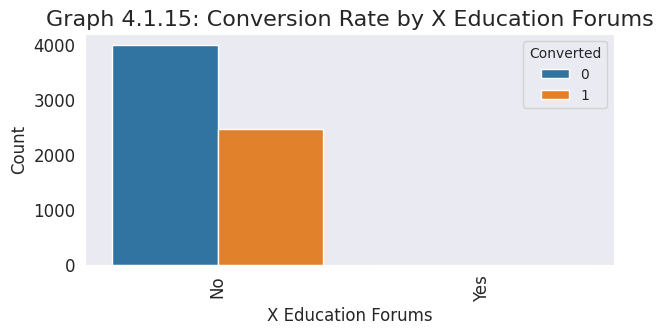

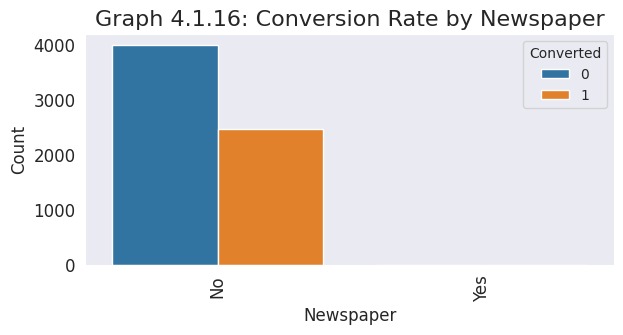

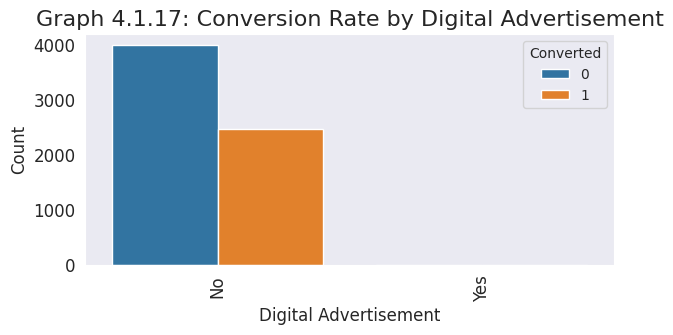

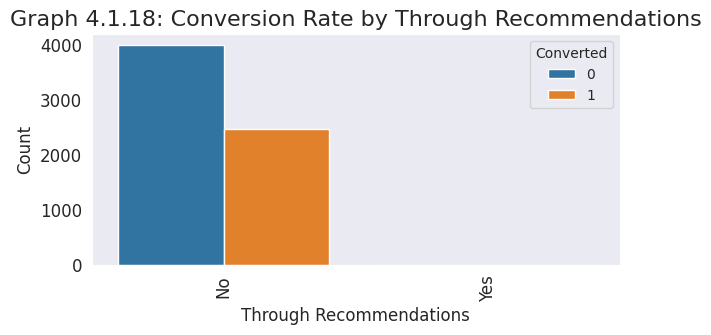

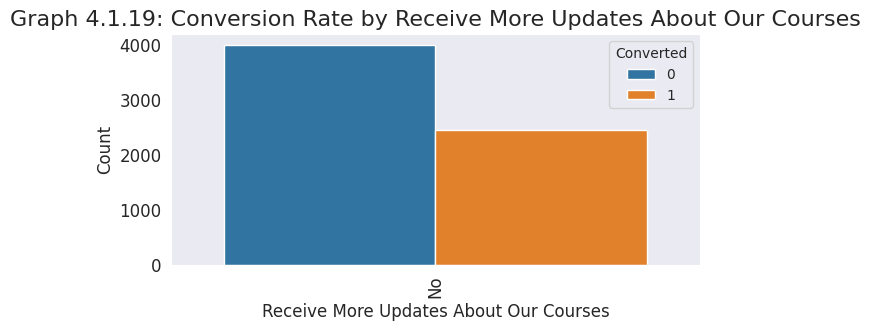

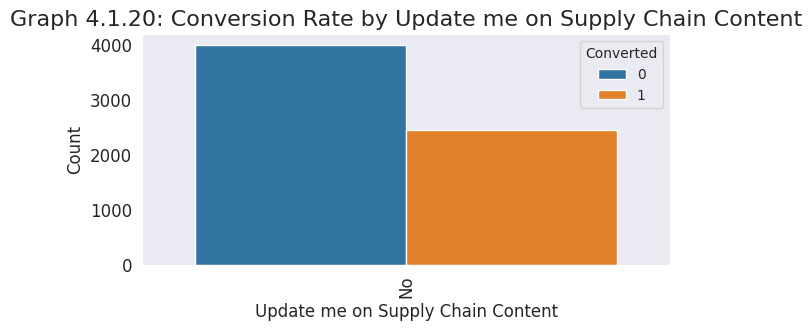

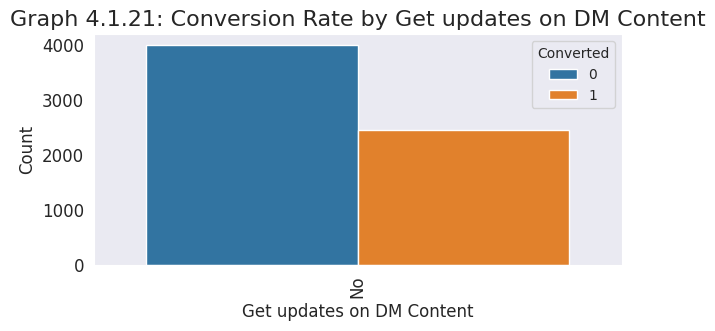

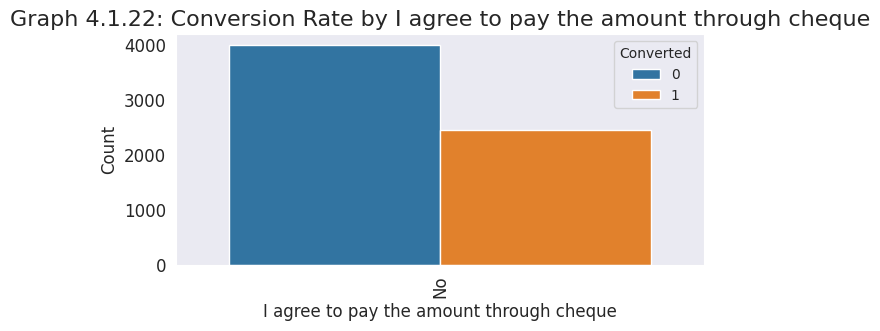

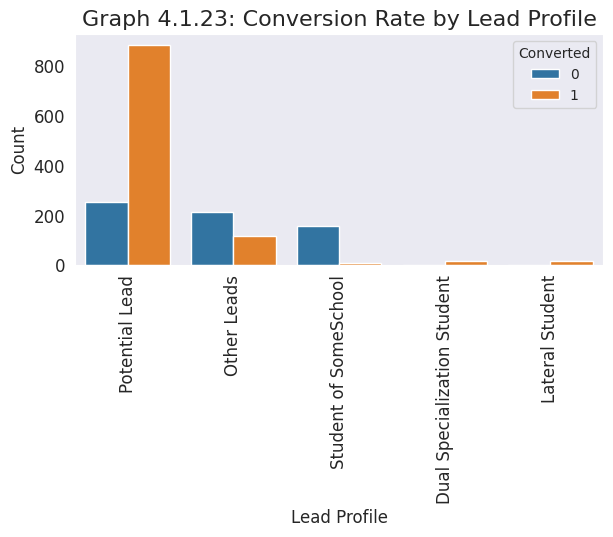

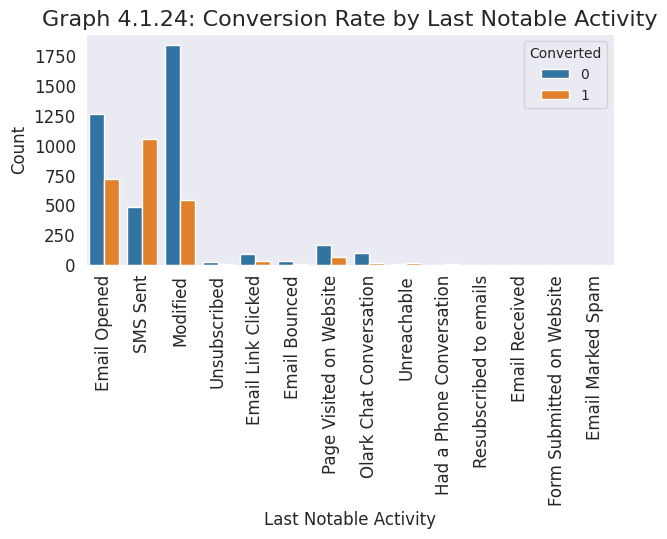

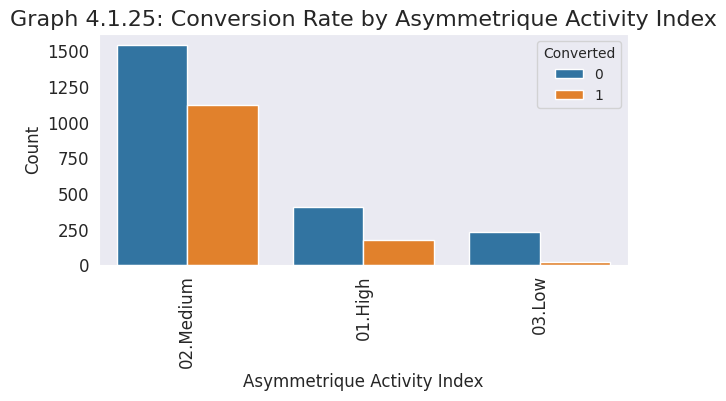

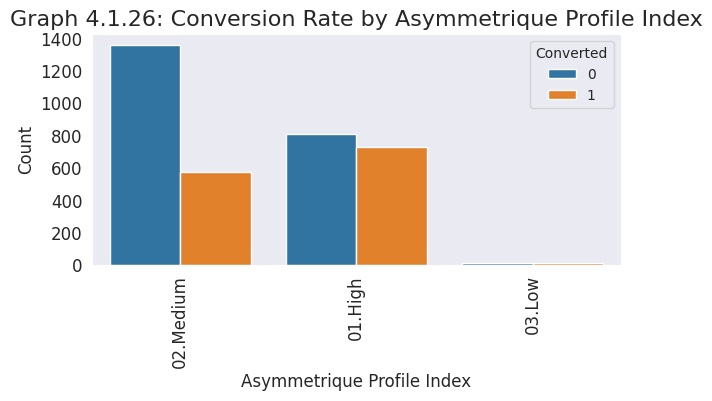

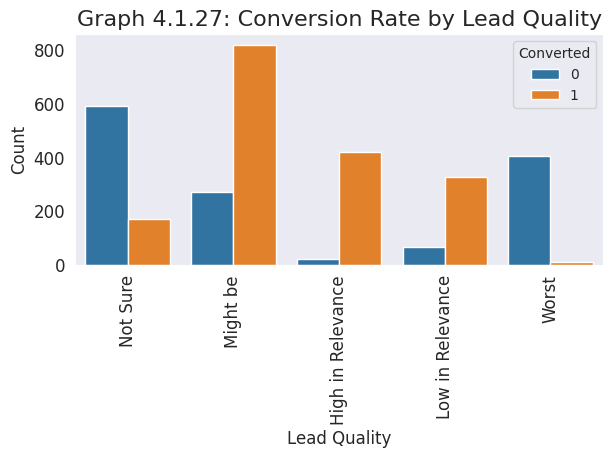

In [ ]:
# Create a list of categorical variables
cat_vars = ['Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation','Lead Origin','How did you hear about X Education','City', 'A free copy of Mastering The Interview','Tags','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','Lead Profile', 'Last Notable Activity','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Lead Quality']
# Create a for loop to plot the graphs
for i in range(len(cat_vars)):
    plt.figure(figsize=(15, 3))

    # Create a subplot with title and x-label
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_vars[i], data=X_train, hue=Y_train)
    plt.title("Graph 4.1." + str(i+1) + ": Conversion Rate by " + cat_vars[i], fontsize=16)
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(cat_vars[i], fontsize=12)
    plt.ylabel("Count",fontsize=12)

    # Show the plot
    plt.show()
    print("\n")

Here are the interpretations for each of the graphs plotted against conversion:

#####**4.1.1 Lead Source**

In [ ]:
X_train['Lead Source'].value_counts()

Google              2075
Direct Traffic      1756
Olark Chat          1230
Organic Search       783
Reference            390
Referral Sites        92
Welingak Website      91
Social channels       36
Others                13
WeLearn                2
Name: Lead Source, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Lead Source'].unique():
    a = Y_train[X_train['Lead Source'] == val].sum()
    b = Y_train[X_train['Lead Source'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Welingak Website,89,91,97.80
Reference,357,390,91.54
WeLearn,1,2,50.00
Others,6,13,46.15
Google,840,2075,40.48
Organic Search,276,783,35.25
Direct Traffic,556,1756,31.66
Referral Sites,24,92,26.09
Olark Chat,310,1230,25.20
Social channels,7,36,19.44


The graph 4.1.1 shows that the Source with the maximum number of leads is “Google” & “Direct Traffic”. The leads coming from Olark Chat has relatively lower conversion rates. This suggests that marketing efforts could be focused more on Google and Direct Traffic sources to increase lead conversion and conversion rates.

Welingak Website and Reference as lead source has lower number of leads but they were the best performing Lead Sources.
Thus, in order to improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

Hence lead sources have significant impact in successful Lead Coversion. and we need to focus on getting more leads from the "Reference" source as it has a higher chance of conversion.

In [ ]:
mapping_source = {'Welingak Website': 'Referral', 'Reference': 'Referral', 'WeLearn': 'Referral', 'Others': 'Others', 'Google': 'Search Engine', 'Organic Search': 'Search Engine', 'Direct Traffic': 'Direct Traffic', 'Referral Sites': 'Referral', 'Olark Chat': 'Olark Chat', 'Social channels': 'Social channels'}
X_train['Lead Source'] = X_train['Lead Source'].map(mapping_source).fillna(X_train['Lead Source'])

In [ ]:
X_train['Lead Source'].value_counts()

Search Engine      2858
Direct Traffic     1756
Olark Chat         1230
Referral            575
Social channels      36
Others               13
Name: Lead Source, dtype: int64

In [ ]:
X_train['Lead Source'].value_counts()

Search Engine      2858
Direct Traffic     1756
Olark Chat         1230
Referral            575
Social channels      36
Others               13
Name: Lead Source, dtype: int64

#####**4.1.2 Do Not Email**

In [ ]:
X_train['Do Not Email'].value_counts()

No     5961
Yes     507
Name: Do Not Email, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Do Not Email'].unique():
    a = Y_train[X_train['Do Not Email'] == val].sum()
    b = Y_train[X_train['Do Not Email'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
No,2387,5961,40.04
Yes,79,507,15.58


The graph 4.1.2 and the conversion ratio shows that leads who have not been emailed have a higher conversion rate compared to those who have been emailed. This suggests that leads may be more receptive to phone calls or other forms of communication, rather than being bombarded with emails.

#####**4.1.3 Do Not Call**

In [ ]:
X_train['Do Not Call'].value_counts()

No     6466
Yes       2
Name: Do Not Call, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Do Not Call'].unique():
    a = Y_train[X_train['Do Not Call'] == val].sum()
    b = Y_train[X_train['Do Not Call'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Yes,2,2,100.00
No,2464,6466,38.11


The graph 4.1.3 shows that leads who have not been called have a slightly higher conversion rate compared to those who have been called.
Even though the conversion ratio for leads that have been called is 100% but the data points are less so we won't be taking this into consideration.
This suggests that leads may prefer communication through other channels, such as email or chat

#####**4.1.4 Last Activity**

In [ ]:
X_train['Last Activity'].value_counts()

Email Opened                    2466
SMS Sent                        1943
Olark Chat Conversation          661
Page Visited on Website          466
Converted to Lead                298
Email Bounced                    235
Email Link Clicked               183
Form Submitted on Website         82
Unreachable                       57
Unsubscribed                      39
Had a Phone Conversation          22
Approached upfront                 6
View in browser link Clicked       5
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Last Activity'].unique():
    a = Y_train[X_train['Last Activity'] == val].sum()
    b = Y_train[X_train['Last Activity'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Email Marked Spam,1,1,100.00
Email Received,2,2,100.00
Resubscribed to emails,1,1,100.00
Approached upfront,6,6,100.00
Had a Phone Conversation,18,22,81.82
SMS Sent,1212,1943,62.38
Email Opened,911,2466,36.94
Unreachable,18,57,31.58
Unsubscribed,10,39,25.64
Email Link Clicked,45,183,24.59


The graph 4.1.4 shows that most number of leads has SMS Sent as the last activity with fairly high conversion rate. Leads with last activity as email opened were also frequent and the conversion rate was moderately good.This suggests that follow-up actions should be prioritized for leads who have shown interest through SMS, or Email.

Leads with last activity as phone conversation were less frequent but their conversion was high (nearly 82%).

Thus, Last Activity has significant impact on Conversion Rate and we need to focus on sending SMS to leads as it has a higher chance of conversion.

In [ ]:
mapping_lastactivity = {'Email Marked Spam': 'Unsubscribed', 'Email Received': 'Email Interaction', 'Resubscribed to emails': 'Approached Upfront', 'Approached upfront': 'Approached Upfront', 'Had a Phone Conversation': 'Had a conversation', 'SMS Sent': 'SMS Sent', 'Email Opened': 'Email Interaction', 'Unreachable': 'Unreachable', 'Unsubscribed': 'Unsubscribed', 'Email Link Clicked': 'Email Interaction', 'Form Submitted on Website': 'Website Visit', 'Page Visited on Website': 'Website Visit', 'View in browser link Clicked': 'Website Visit', 'Converted to Lead': 'Converted to Lead', 'Email Bounced': 'Unreachable', 'Olark Chat Conversation': 'Had a conversation', 'Visited Booth in Tradeshow': 'Visited Booth in Tradeshow'}
X_train['Last Activity'] = X_train['Last Activity'].map(mapping_lastactivity).fillna(X_train['Last Activity'])

In [ ]:
# X_train = X_train[X_train['Last Activity'] != 'Visited Booth in Tradeshow']

In [ ]:
X_train['Last Activity'].value_counts()

Email Interaction             2651
SMS Sent                      1943
Had a conversation             683
Website Visit                  553
Converted to Lead              298
Unreachable                    292
Unsubscribed                    40
Approached Upfront               7
Visited Booth in Tradeshow       1
Name: Last Activity, dtype: int64

#####**4.1.5 Specialization**

In [ ]:
X_train['Specialization'].value_counts()

Unknown                              2377
Finance Management                    682
Marketing Management                  604
Human Resource Management             593
Operations Management                 370
Business Administration               282
Supply Chain Management               243
IT Projects Management                241
Banking, Investment And Insurance     227
Travel and Tourism                    138
Media and Advertising                 133
International Business                121
Healthcare Management                 101
Hospitality Management                 87
E-COMMERCE                             84
Retail Management                      70
Rural and Agribusiness                 47
E-Business                             37
Services Excellence                    31
Name: Specialization, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Specialization'].unique():
    a = Y_train[X_train['Specialization'] == val].sum()
    b = Y_train[X_train['Specialization'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Healthcare Management,54,101,53.47
Rural and Agribusiness,23,47,48.94
"Banking, Investment And Insurance",110,227,48.46
Operations Management,175,370,47.30
Marketing Management,280,604,46.36
Finance Management,316,682,46.33
Human Resource Management,267,593,45.03
Business Administration,122,282,43.26
Media and Advertising,57,133,42.86
Supply Chain Management,103,243,42.39


The graph 4.1.5 shows that leads who have a specialization in healthcare management have highest conversion rate but less leads.
Leads with finance and marketing management as specialisation have most number of leads with fairly good conversion rate. Certain leads with specializations such as banking and operations also have high conversion ratio and good number of conversions.

This suggests that targeted marketing efforts could be focused on leads with these specializations to increase conversion rates.


In [ ]:
mapping_specialization = {'Healthcare Management': 'Healthcare Management', 'Rural and Agribusiness': 'Business', 'Banking, Investment And Insurance': 'Finance', 'Operations Management': 'Operations', 'Marketing Management': 'Marketing', 'Finance Management': 'Finance', 'Human Resource Management': 'Human Resource Management', 'Business Administration': 'Business', 'Media and Advertising': 'Media and Advertising', 'Supply Chain Management': 'Supply Chain Management', 'IT Projects Management': 'IT Projects Management', 'Retail Management': 'Retail Management', 'E-COMMERCE': 'Business', 'Hospitality Management': 'Hospitality Management', 'Travel and Tourism': 'Hospitality Management', 'E-Business': 'Business', 'International Business': 'Business', 'Services Excellence': 'Hospitality Management', 'Unknown': 'Unknown'  }
X_train['Specialization'] = X_train['Specialization'].map(mapping_specialization).fillna(X_train['Specialization'])

In [ ]:
X_train['Specialization'].value_counts()

Unknown                      2377
Finance                       909
Marketing                     604
Human Resource Management     593
Business                      571
Operations                    370
Hospitality Management        256
Supply Chain Management       243
IT Projects Management        241
Media and Advertising         133
Healthcare Management         101
Retail Management              70
Name: Specialization, dtype: int64

#####**4.1.6 Occupation**

In [ ]:
X_train['What is your current occupation'].value_counts()

Unemployed              3914
Missing                 1893
Working Professional     502
Student                  136
Housewife                  9
Other                      8
Businessman                6
Name: What is your current occupation, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['What is your current occupation'].unique():
    a = Y_train[X_train['What is your current occupation'] == val].sum()
    b = Y_train[X_train['What is your current occupation'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Housewife,9,9,100.00
Working Professional,463,502,92.23
Businessman,3,6,50.00
Unemployed,1670,3914,42.67
Other,3,8,37.50
Student,51,136,37.50
Missing,267,1893,14.10


The graph 4.1.6 shows that leads with the occupation status of Working Professional has a higher conversion rate compared to those who are Unemployed or have Other occupations.
The “Unemployed” occupation generated the maximum number of leads but the conversion ratio was less.
The “Working Professional” occupation was the best performing Occupation with a 92.23% conversion ratio, “Housewife” occupation had a 100% conversion ratio, but we are not considering it due to fewer data points.

This suggests that targeted marketing efforts could be focused on leads with these occupation statuses to increase conversion rates.



In [ ]:
mapping_occupation = {'Housewife': 'Other', 'Businessman': 'Other', 'Working Professional': 'Working Professional', 'Unemployed': 'Unemployed', 'Student': 'Student', 'Missing': 'Missing'}
X_train['What is your current occupation'] = X_train['What is your current occupation'].map(mapping_occupation).fillna(X_train['What is your current occupation'])

In [ ]:
X_train['What is your current occupation'].value_counts()

Unemployed              3914
Missing                 1893
Working Professional     502
Student                  136
Other                     23
Name: What is your current occupation, dtype: int64

#####**4.1.7 Lead Origin**

In [ ]:
# we check the value counts in Lead Origin

X_train['Lead Origin'].value_counts()

Landing Page Submission    3416
API                        2504
Lead Add Form               514
Lead Import                  33
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Lead Origin'].unique():
    a = Y_train[X_train['Lead Origin'] == val].sum()
    b = Y_train[X_train['Lead Origin'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Quick Add Form,1,1,100.00
Lead Add Form,472,514,91.83
Landing Page Submission,1219,3416,35.69
API,768,2504,30.67
Lead Import,6,33,18.18


Graph 4.1.7 depicts that for Lead Origin "Lead Add Form" the conversion rate was highest as compared to others with 91.83% conversion rate but count of lead are not very high..
API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerably high.
Lead Import are very less in count.


####**4.1.8 How did you hear about X Education**

In [ ]:
X_train['How did you hear about X Education'].value_counts()

Online Search            599
Word Of Mouth            236
Student of SomeSchool    222
Other                    128
Multiple Sources         105
Advertisements            47
Social Media              46
SMS                       16
Email                     15
Name: How did you hear about X Education, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['How did you hear about X Education'].unique():
    a = Y_train[X_train['How did you hear about X Education'] == val].sum()
    b = Y_train[X_train['How did you hear about X Education'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Email,7,15,46.67
Word Of Mouth,108,236,45.76
Other,58,128,45.31
Student of SomeSchool,98,222,44.14
Social Media,20,46,43.48
Advertisements,20,47,42.55
Online Search,251,599,41.90
Multiple Sources,41,105,39.05
SMS,3,16,18.75
NaN,0,0,NaN


Graph 4.1.8 depicts that most people know about X Education through online search, with moderate conversion rate of 42%. The conversion rate for people who knew about this platform was highest but the leads were considerably low.

This suggests that we should focus on marketing and promotion of the platform through online search optimisation in order to increase the Lead Conversions. People can also act as important resource to spread awareness about a platform and increase the conversion rate.

####**4.1.9 City**




In [ ]:
X_train['City'].value_counts()

Mumbai                         2238
Thane & Outskirts               513
Other Cities                    494
Other Cities of Maharashtra     321
Other Metro Cities              264
Tier II Cities                   51
Name: City, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['City'].unique():
    a = Y_train[X_train['City'] == val].sum()
    b = Y_train[X_train['City'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Thane & Outskirts,232,513,45.22
Other Cities of Maharashtra,134,321,41.74
Other Metro Cities,110,264,41.67
Mumbai,896,2238,40.04
Other Cities,194,494,39.27
Tier II Cities,15,51,29.41
NaN,0,0,NaN


From Graph 4.1.9 and the conversions rates, we observe that Mumbai has highest number of Leads with moderately good conversion rate. The onversion rate for Thane and Outskirts is the highest but the leads are less in number. This suggests that by targeting these certain cities, we can get improved lead conversions.

####**4.1.10 A free copy of Mastering The Interview**




In [ ]:
X_train['A free copy of Mastering The Interview'].value_counts()

No     4451
Yes    2017
Name: A free copy of Mastering The Interview, dtype: int64

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['A free copy of Mastering The Interview'].unique():
    a = Y_train[X_train['A free copy of Mastering The Interview'] == val].sum()
    b = Y_train[X_train['A free copy of Mastering The Interview'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
No,1767,4451,39.70
Yes,699,2017,34.66


The graph 4.1.10 provides insights into the distribution of leads based on their interest in receiving a free copy of the resource.
The count of leads who expressed interest in 'A free copy' is significantly less than the count of leads who did not express interest, it suggests that a substantial portion of the leads are not interested in the resource.
The reason might be we have large proportion of audience who are "Unemployed" and the only thing they are interested about upskilling themselves and not giving priority to the interview preparation on the early stage.

####**4.1.11 Tags**




In [ ]:
X_train['Tags'].value_counts()

Will revert after reading the email                  1434
Ringing                                               847
Interested in other courses                           368
Already a student                                     328
Closed by Horizzon                                    247
switched off                                          181
Busy                                                  125
Lost to EINS                                          112
Not doing further education                           109
Interested  in full time MBA                           81
Graduation in progress                                 67
invalid number                                         62
Diploma holder (Not Eligible)                          47
wrong number given                                     31
opp hangup                                             23
number not provided                                    21
in touch with EINS                                     11
Lost to Others

In [ ]:
#Conversion Ratio
d = {}
for val in X_train['Tags'].unique():
    a = Y_train[X_train['Tags'] == val].sum()
    b = Y_train[X_train['Tags'] == val].count()
    d[val] = [a, b, round(a/b*100, 2)]
pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: 'Converted', 1: 'Leads', 2: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Converted,Leads,Conversion Ratio
Interested in Next batch,5,5,100.00
Shall take in the next coming month,1,1,100.00
Lateral student,3,3,100.00
Closed by Horizzon,246,247,99.60
Lost to EINS,110,112,98.21
Will revert after reading the email,1389,1434,96.86
Busy,65,125,52.00
Want to take admission but has financial problems,2,4,50.00
in touch with EINS,3,11,27.27
Still Thinking,1,4,25.00


Graph 4.1.11 provides insights into the distribution of leads based on the tags assigned to them.
The majority of leads are either marked as "Will revert after reading the email" indicating that there is a significant portion of leads requiring further follow-up or lacking specific interest.

There is a notable count of leads who are "Interested in other courses" or have been "Closed by horizzon," suggesting potential opportunities for cross-selling or upselling.

Categories like "Busy" and "Switched off" have a minimal count, implying a relatively small number of leads facing these situations.

The presence of various other tags suggests the existence of additional factors influencing lead behavior or specific lead characteristics.

Overall, these observations highlight the need for effective follow-up strategies, targeted communication, and potential areas for improving lead engagement and conversion rates.

####**Other Categorical Variables**

For certain variables such as 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', the countplot depicts that **'No'** was the selection made by majority of users.


* **'Search':** The majority of leads did not originate from search engines, indicating that search engine marketing may not be the most effective strategy for lead generation in this case.

* **'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', and 'Digital Advertisement':** These channels show very few leads or conversions, suggesting that they may not be effective in attracting potential customers. It may be more beneficial to allocate resources to other marketing channels.

* **'Through Recommendations':** Although recommendations can be a valuable source of leads, the majority of leads did not come through recommendations. This indicates that other channels or strategies may have a higher impact on lead generation.

* **'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', and 'Get updates on DM Content':** Most leads are not interested in receiving additional updates or content related to courses, supply chain, or DM (digital marketing). It is important to focus on other factors that drive lead conversion.

* **'I agree to pay the amount through cheque':** The majority of leads are not willing to pay via cheque. This suggests that other payment methods are more preferred and should be prioritized in the conversion process.











The other variables are as follows:
* **'Lead Profile':** The majority of leads fall under the 'Other Leads' and 'Potential Lead' categories. This suggests that there may be a need for further profiling and qualification of leads to improve conversion rates.

* **'Last Notable Activity':** The countplot 4.1.24 reveals that the most common last notable activity is 'Email Opened', followed by 'SMS Sent'. This indicates that email and SMS communications play a significant role in engaging leads. It may be beneficial to focus on optimizing email and SMS campaigns for lead conversions.

* **'Asymmetrique Activity Index':** The countplot 4.1.25 suggests that leads with extremely high activity levels may not necessarily result in higher conversions. Balancing activity levels and targeting the right leads can lead to better outcomes.

* **'Asymmetrique Profile Index':** The countplot 4.1.26 demonstrates that leads with more detailed and complete profiles tend to have a better chance of conversion.

* **'Lead Quality':** The countplot 4.1.27 reveals that a large proportion of leads have 'Not Sure' or 'Might be' quality levels. However, leads with 'High' quality have a significantly higher conversion rate. This suggests that focusing on leads with higher quality scores can potentially improve overall conversion rates.

###**4.2 Relation between numerical variables and the target variable**


**A) Pairplots and Correlation Matrix**

<Figure size 1200x1200 with 0 Axes>

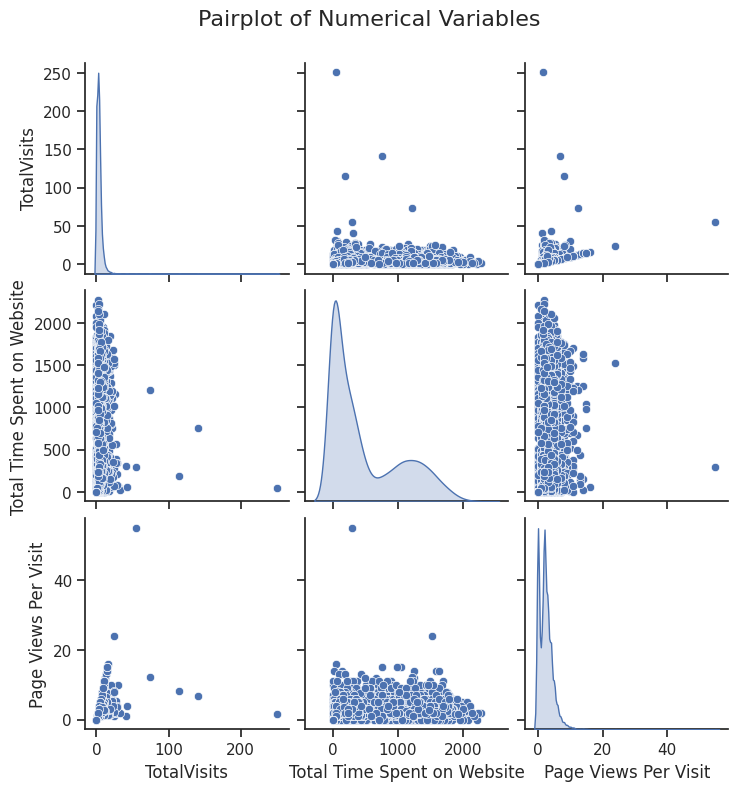

In [ ]:
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
#Pairplots of numerical variables
sns.set(style="ticks")
plt.figure(figsize=(12, 12))
sns.pairplot(X_train[numerical_cols], diag_kind="kde")
plt.suptitle("Pairplot of Numerical Variables", fontsize=16, y=1.05)
plt.show()


The pairplot gives us a visual representation of the relationship between pairs of variables. The scatterplots show the distribution of each variable and the correlation between them. From the pairplot, we can infer that TotalVisits and Page Views Per Visit are positively correlated, which makes sense because *if a lead visits the website more times, they are more likely to view more pages*. We can also see a positive correlation between Total Time Spent on Website and Page Views Per Visit, which is again logical because *if a lead spends more time on the website, they are more likely to view more pages*. However, we don't see any significant correlation between TotalVisits and Total Time Spent on Website.

Now we will explore the relationship between numerical variables and the target variable 'Converted'

In [ ]:
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

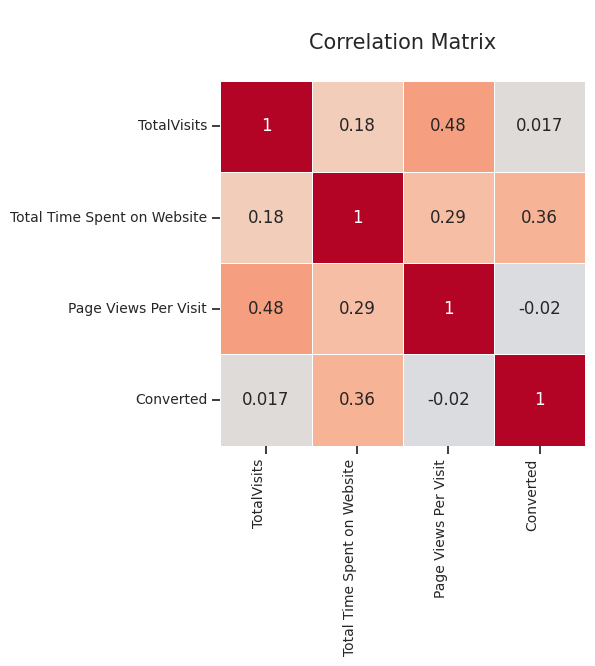

In [ ]:
# create a correlation matrix of relevant numerical variables in X_train and target variable in Y_train
corr_matrix = pd.concat([X_train[num_vars],Y_train],axis=1).corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, cbar= False,square=True, center=0)
plt.yticks(fontsize=10)
plt.xticks(rotation=90, ha='right',fontsize=10)
plt.subplots_adjust(bottom=0.15)
plt.gcf().patch.set_facecolor('w')
plt.title('\nCorrelation Matrix\n',fontsize=15)
plt.show()

Based on the heatmap, we can observe that there are some moderate positive correlations between a few numerical variables such as "TotalVisits" and "Total Time Spent on Website", "Page Views Per Visit" and "Total Time Spent on Website", and "Page Views Per Visit" and "TotalVisits". However, it is also evident that none of the features have a very strong positive or negative correlation with the target variable 'Converted'.

The highest correlation with the target variable is observed for 'TotalVisits' and 'Page Views Per Visit', but the correlation is still relatively weak (0.47). This suggests that predicting the conversion of a lead based solely on numerical features might be challenging and that other types of features, such as categorical features, might be more informative.

**B) Boxplots**

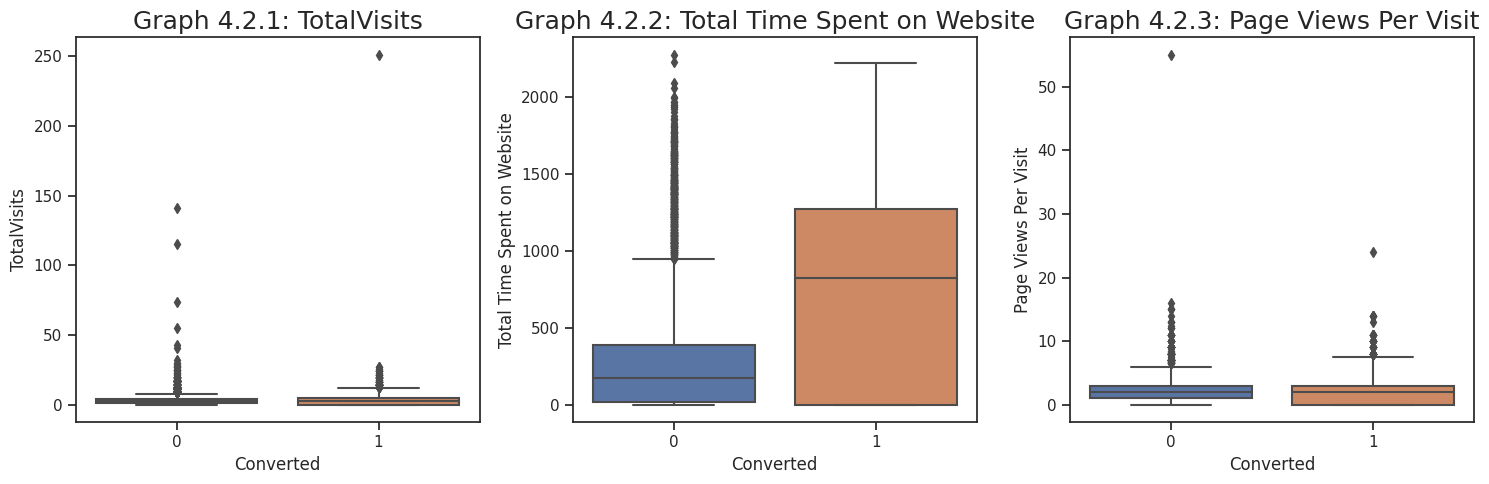

In [ ]:

fig, axs = plt.subplots(ncols=3, figsize=(15,5))
fig.patch.set_facecolor('white')

for i, var in enumerate(num_vars):
    sns.boxplot(x=Y_train, y=X_train[var], ax=axs[i])
    axs[i].set_title('Graph 4.2.'+str(i+1)+': '+var,fontsize=18)
    axs[i].set_xlabel('Converted')
    axs[i].set_ylabel(var)


plt.tight_layout()
plt.show()


From the boxplots, we can see that most of the numerical features have outliers. This means that there are some data points that are significantly different from the rest of the data.
For example, in the 'TotalVisits' feature, we can see that there are several data points that are much higher than the rest of the data. These outliers can have a significant impact on the results of our analysis and should be examined further.

We can also see that there are some features that have a wide range of values, such as 'Total Time Spent on Website' and 'Page Views Per Visit'. These features could be important predictors of lead conversion, as they indicate a high level of engagement with the website.

Now, lets have a look at each of the numerical variable in our dataset

#####**4.2.1 Total Visits**

In [ ]:
X_train['TotalVisits'].describe()


count    6468.000000
mean        3.421769
std         5.299904
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

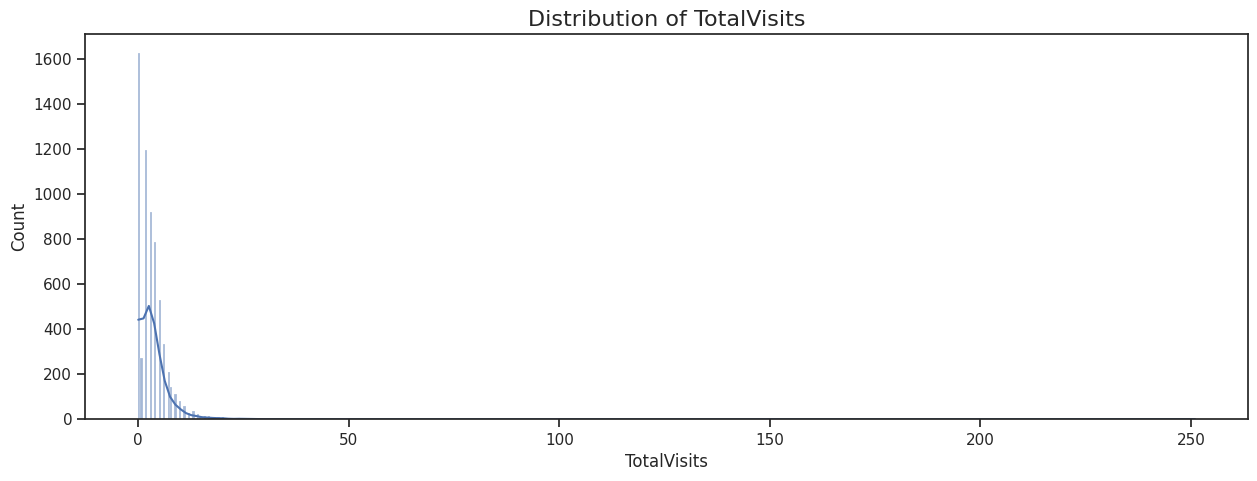

In [ ]:
# Plot distribution of TotalVisits
plt.figure(figsize=(15, 5))
sns.histplot(X_train['TotalVisits'], kde=True)
plt.xlabel('TotalVisits', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of TotalVisits', fontsize=16)
plt.show()


The majority of the leads have made less than 10 visits to the website.The distribution of total visits is right skewed.

The boxplot (Graph 4.2.1) shows that there are several data points that are much higher than the rest of the data, i.e, the presence of outliers. There is a positive correlation between 'TotalVisits' and 'Converted'. It means that customers who visited the website more often are more likely to be converted.

We may need to target leads who have made more visits to the website as they might be more interested in the services.

#####**4.2.2 Total Time Spent on Website**

In [ ]:
X_train['Total Time Spent on Website'].describe()


count    6468.000000
mean      483.875850
std       546.565663
min         0.000000
25%        12.000000
50%       246.000000
75%       926.500000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

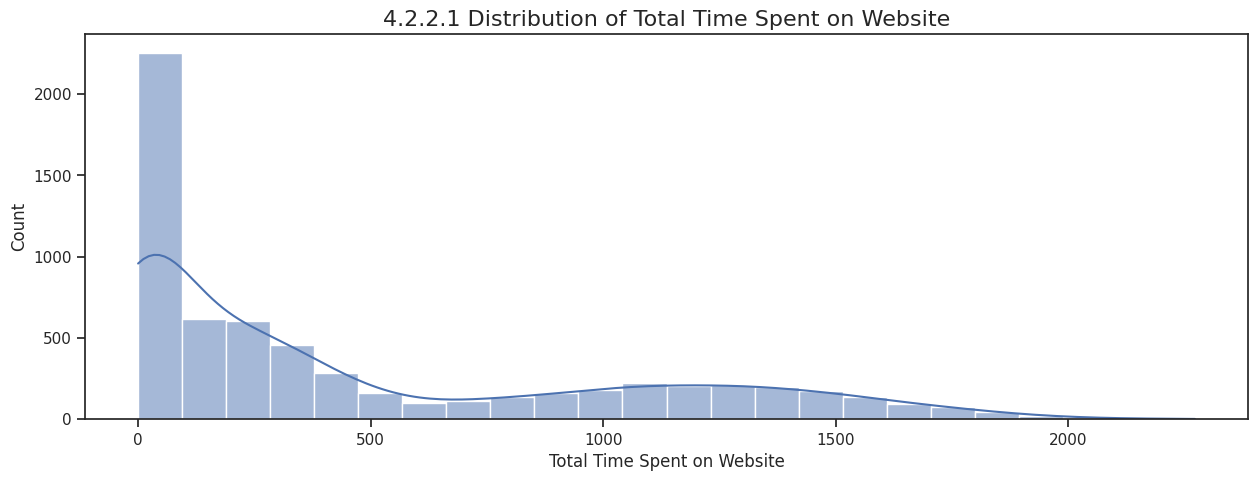

In [ ]:
# Plot distribution of Total Time Spent on Website
plt.figure(figsize=(15, 5))
sns.histplot(X_train['Total Time Spent on Website'], kde=True)
plt.xlabel('Total Time Spent on Website', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('4.2.2.1 Distribution of Total Time Spent on Website', fontsize=16)
plt.show()


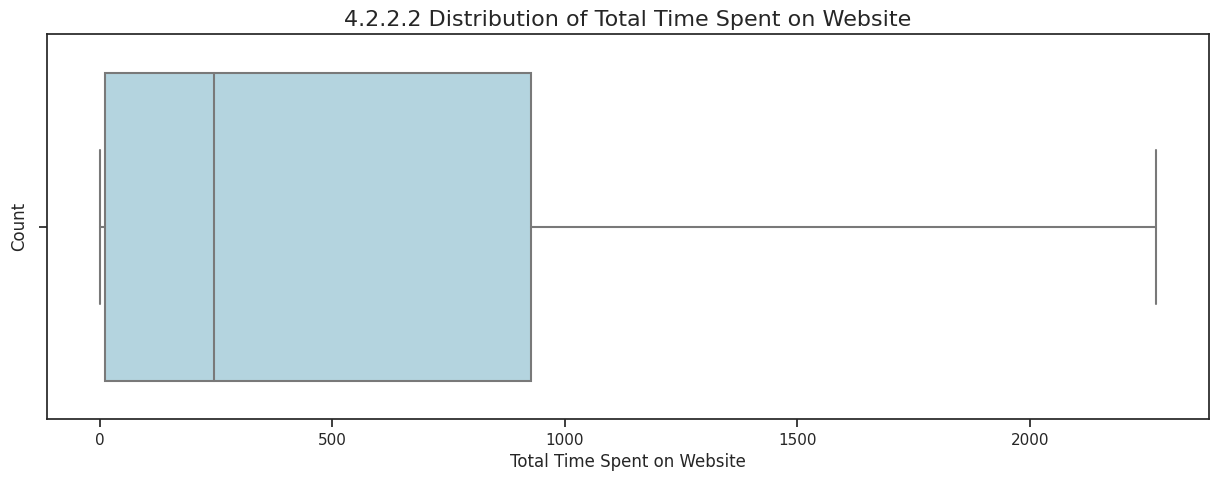

In [ ]:
# Plot Boxplot of Total Time Spent on Website
plt.figure(figsize=(15, 5))
sns.boxplot(data= X_train, x='Total Time Spent on Website',color='lightblue')
plt.xlabel('Total Time Spent on Website', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('4.2.2.2 Distribution of Total Time Spent on Website', fontsize=16)
plt.show()


The majority of the leads have spent less than 2000 seconds on the website.
From the distribution we can infer that the column is right skewed and as shown in graph 4.2.2 there are no outliers in the data.
Leads with more time spent on the website are more likely to be converted.
Thus we can infer that we need to find ways to engage the leads and make them spend more time on the website.


#####**4.2.3 Page Views Per Visit**

In [ ]:
X_train['Page Views Per Visit'].describe()


count    6468.000000
mean        2.317126
std         2.181726
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

Text(0.5, 1.0, 'Distribution of Page Views Per Visit')

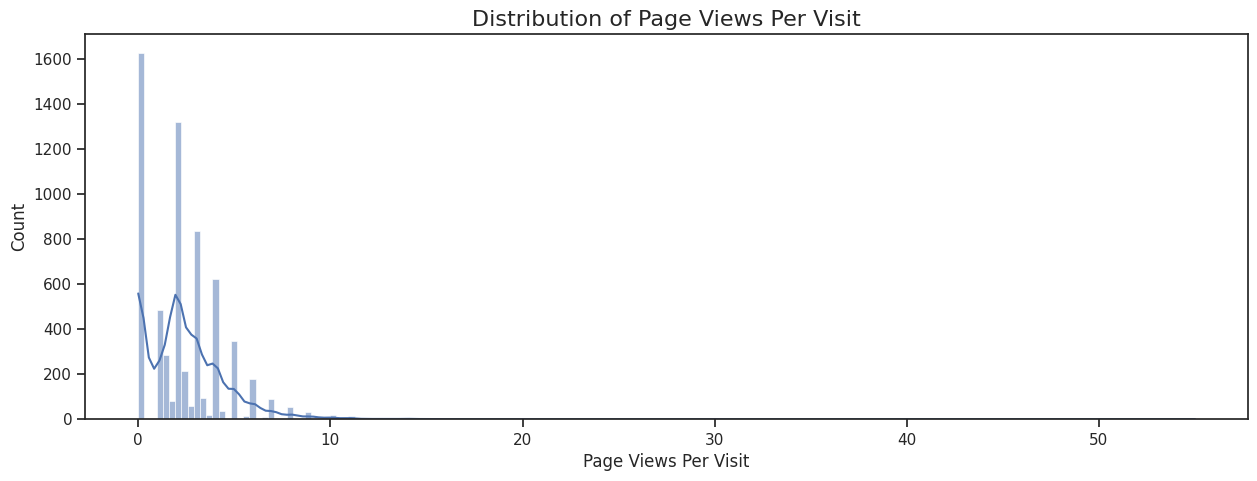

In [ ]:
# Plot distribution of Page Views Per Visit
plt.figure(figsize=(15, 5))
sns.histplot(X_train['Page Views Per Visit'], kde=True)
plt.xlabel('Page Views Per Visit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Page Views Per Visit', fontsize=16)


Text(0.5, 1.0, 'Distribution of Page Views Per Visit')

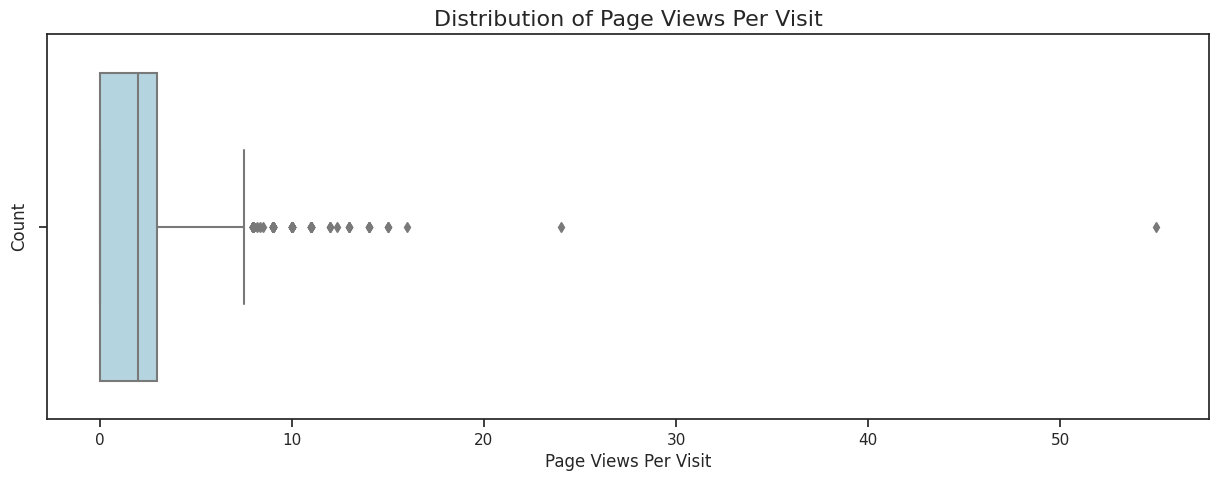

In [ ]:
# Plot distribution of Page Views Per Visit
plt.figure(figsize=(15, 5))
sns.boxplot(data= X_train, x='Page Views Per Visit', color='lightblue')
plt.xlabel('Page Views Per Visit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Page Views Per Visit', fontsize=16)

The majority of the leads have viewed 2-3 pages per visit.The distribution of the variable Page Views Per Visit is skewed to right.

From boxplot (graph 4.2.3) we observe that Page Views Per Visit has a lot of extreme values, thus we can infer that the website has enough content to engage the leads, but we need to find ways to make them explore more pages.

# **5. Feature Selection**




---




We will now perform feature selection as removing irrelevant features will result in a model that perfoms better, is easier to understand and runs faster.

 ### 5.1 Setting aside variables based on prior information.

In [ ]:
#categorical
X_train.drop(cols_to_drop_cat, axis=1, inplace=True)
#numerical
X_train.drop(cols_to_drop_num, axis=1, inplace=True)

In [ ]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1871,API,Olark Chat,No,No,0.0,0,0.00,Email Interaction,Marketing,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
6795,Landing Page Submission,Direct Traffic,No,No,4.0,487,1.33,Email Interaction,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3516,API,Olark Chat,No,No,5.0,106,2.50,Email Interaction,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
8105,Landing Page Submission,Search Engine,No,No,5.0,1230,5.00,SMS Sent,Hospitality Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent
3934,API,Olark Chat,No,No,0.0,0,0.00,Email Interaction,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


### 5.2 Setting variables aside on the basis of variability

In [ ]:
numerical_features_new, categorical_features_new = column_categorizer(X_train)

In [ ]:
print(f'NUMERICAL FEATURES :{numerical_features_new} \n\nCATEGORICAL FEATURES :{categorical_features_new}')

NUMERICAL FEATURES :['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 

CATEGORICAL FEATURES :['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


##### 5.2.1 Setting aside Numerical Variables with zero variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X_train.select_dtypes(include=[np.number]))

VarianceThreshold(threshold=0)

In [ ]:
# finding non-constant features
sum(var_thres.get_support())

3

Since we are left with only three numerical features and all three have of them have zero variance, we conclude that none of the numerical features left have constant variance.

##### 5.2.2 Setting aside Categorical Variables with zero variance


---



---



Now we will check the categorical variables with constant variance. For this we will find the number of unique values in each of the categorical variables.

In [ ]:
for i in [categorical_features_new]:
  print(f"Number of unique values:\n{X_train[i].nunique()}")

Number of unique values:
Lead Origin                                  5
Lead Source                                  6
Do Not Email                                 2
Do Not Call                                  2
Last Activity                                9
Specialization                              12
What is your current occupation              5
Search                                       2
Magazine                                     1
Newspaper Article                            2
X Education Forums                           2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Receive More Updates About Our Courses       1
Update me on Supply Chain Content            1
Get updates on DM Content                    1
I agree to pay the amount through cheque     1
A free copy of Mastering The Interview       2
Last Notable Activity                       14
dtype: int64


Here columns like Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque have only 1 unique value, i.e., these are constant categories. Hence, we will drop these columns.

In [ ]:
cols_to_drop_cat.extend(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"])

In [ ]:
X_train.drop(["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis =1, inplace = True)

### **5.3 Z-test for checking relationship between numerical variables and the target variable**


---






First we will plot the distribution of each of these variables under Converted: 0 and Convereted: 1 separately.

In [ ]:
numerical_features_new

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

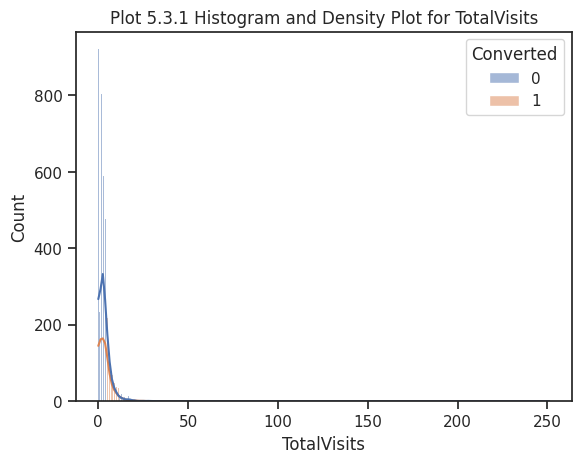

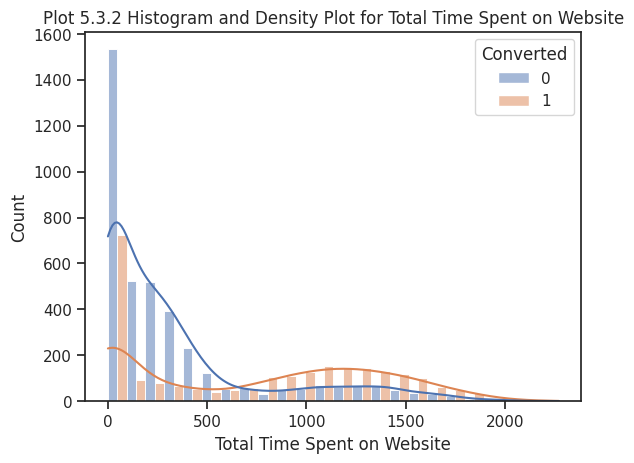

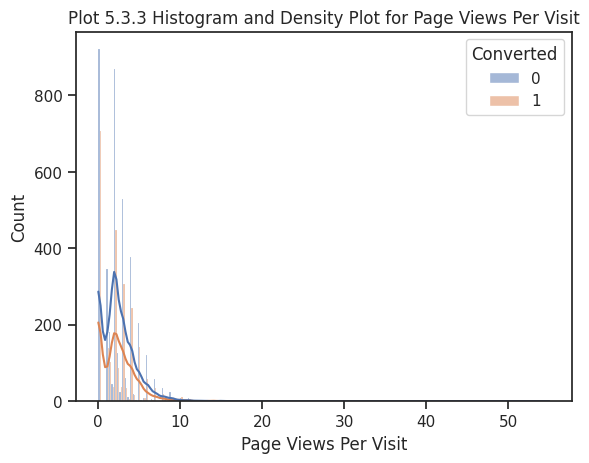

In [ ]:

plot_data =pd.concat([X_train,Y_train],axis=1)

i=1
for var in numerical_features_new:

    sns.histplot(data=plot_data,x=plot_data[var],kde=True,hue='Converted',multiple="dodge")
    plt.title(f"Plot 5.3.{i} Histogram and Density Plot for {var}")
    i+=1
    plt.show()


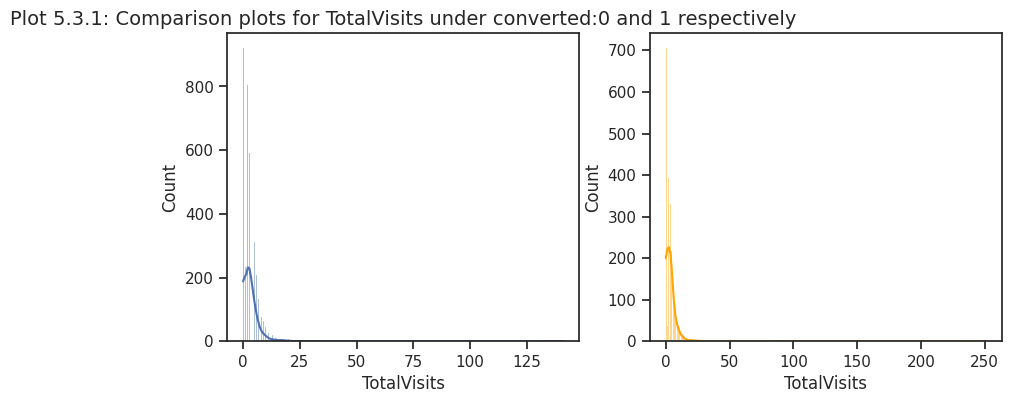

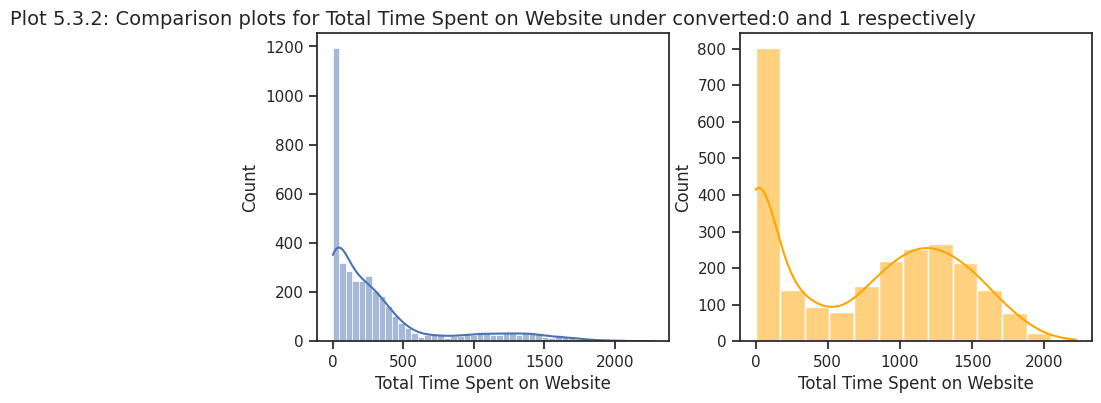

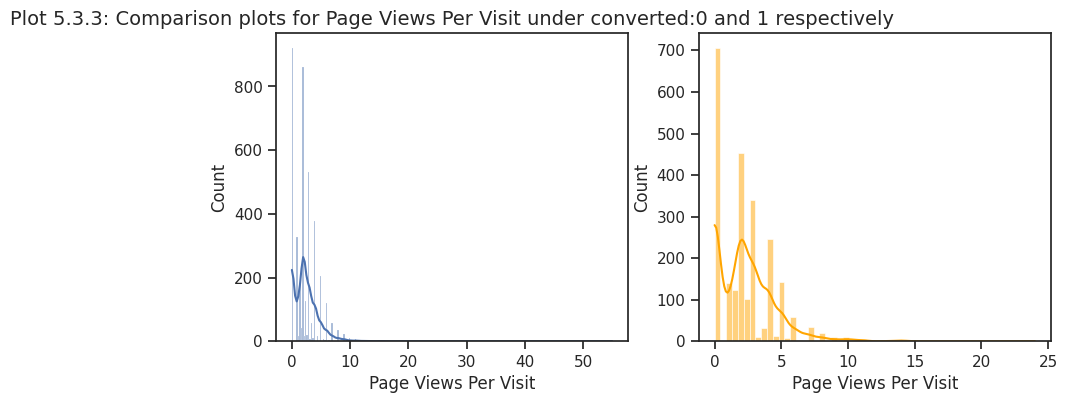

In [ ]:
#plot them side by side


# Plot histogram and density plot where target var is 0 vs where it is 1.
i=1
for var in numerical_features_new:

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(data=plot_data,x=plot_data[plot_data['Converted']==0][var],kde=True)
    plt.title(f"Plot 5.3.{i}: Comparison plots for {var} under converted:0 and 1 respectively",fontsize=14)
    plt.subplot(1,2,2)
    sns.histplot(data=plot_data,x=plot_data[plot_data['Converted']==1][var],kde=True,color='orange')
    plt.title(" ")
    plt.show()
    print('\n\n')
    i+=1

- **Hypothesis Test:** ( for each numeric variable)
---
**Test used:** Two sample Z-test.

Two sample Z-test compares the means of samples of independent groups taken from a normal population.

  -  **Null Hypothesis:**  There is no significant difference between the means of two populations, i.e. the sample has been drawn from the same population, here it means that for any numeric variable there is no clear distinction in the values for users who get converted versus those who dont.

  - **Alternative Hypothesis:**
    The two population means differ significantly.

In [ ]:

results = {}

# Iterate over the numerical variables
for var in numerical_features_new:
    group1 = X_train[Y_train == 0][var]
    group2 = X_train[Y_train == 1][var]

    # Perform t-test for the current variable
    z_statistic, p_value = ztest(group1, group2, value=0)

    # Store the results in a dictionary
    results[var] = {'Z-Statistic': z_statistic, 'P-Value': p_value}

# Print the results
print("Z-Test Results:")
for var, result in results.items():
    print(var, "- Z-Statistic:", result['Z-Statistic'])
    print(var, "- P-Value:", result['P-Value'])

Z-Test Results:
TotalVisits - Z-Statistic: -1.386025566447019
TotalVisits - P-Value: 0.1657390968570911
Total Time Spent on Website - Z-Statistic: -31.466713959028446
Total Time Spent on Website - P-Value: 2.479836036115137e-217
Page Views Per Visit - Z-Statistic: 1.5906550448693624
Page Views Per Visit - P-Value: 0.11168722928993592


**Results:**

We can see that the p-value for 'Total time spent on website' is significant, hence the mean time spent on website for customers who get converted is different than those who don't.

**Possible biasedness which affects our tests:**
if we look at the graph we made for 'TotalVisits' (and average page views per visit) closely where we superimposed the graphs on each other we could see that that the distribution of the variables is positively skewed and we do have some extreme values present, which might overestimate the central tendencies of our variables. We will again run this test after we have treated our outliers to look for any differences.

### **5.4 Chi-Square test for checking the independence of categorical and target variable.**


---





**Hypothesis Test:**

In [ ]:
numerical_features_left, categorical_features_left = column_categorizer(X_train)

In [ ]:
print(f'NUMERICAL FEATURES :{numerical_features_left} \n\nCATEGORICAL FEATURES :{categorical_features_left}')

NUMERICAL FEATURES :['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 

CATEGORICAL FEATURES :['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
from scipy.stats import chi2_contingency
input_features = X_train.columns[:-1]

for feature in categorical_features_left:
  contingency_table = pd.crosstab(X_train[feature], Y_train)
  chi2, p, dof, expected = chi2_contingency(contingency_table,correction=True)

  print("\n")
  print(f"Feature: {feature}")
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")
  print(f"Degrees of freedom: {dof}")
  print("Expected frequencies:\n", expected)



Feature: Lead Origin
Chi-square statistic: 703.1958107596963
P-value: 7.083527313051239e-151
Degrees of freedom: 4
Expected frequencies:
 [[1.54932096e+03 9.54679035e+02]
 [2.11361039e+03 1.30238961e+03]
 [3.18031540e+02 1.95968460e+02]
 [2.04183673e+01 1.25816327e+01]
 [6.18738404e-01 3.81261596e-01]]


Feature: Lead Source
Chi-square statistic: 592.2148463775086
P-value: 9.725589969760386e-126
Degrees of freedom: 5
Expected frequencies:
 [[1086.50463822  669.49536178]
 [ 761.04823748  468.95176252]
 [   8.04359926    4.95640074]
 [ 355.77458256  219.22541744]
 [1768.35435993 1089.64564007]
 [  22.27458256   13.72541744]]


Feature: Do Not Email
Chi-square statistic: 117.48826433123851
P-value: 2.2442406363570144e-27
Degrees of freedom: 1
Expected frequencies:
 [[3688.29962894 2272.70037106]
 [ 313.70037106  193.29962894]]


Feature: Do Not Call
Chi-square statistic: 1.153110473601299
P-value: 0.2828989639769992
Degrees of freedom: 1
Expected frequencies:
 [[4.00076252e+03 2.4652374

### **5.5 Cramer's V coefficient for checking correlation between categorical variables and the target variable.**


---






**About Cramer's V:**
Cramer’s V is used to understand the strength of the relationship between two variables. To use it, your variables of interest should be categorical with two or more unique values per category.

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [ ]:
for feature in categorical_features_left:
  confusion_matrix = pd.crosstab(X_train[feature], Y_train)
  v = cramers_v(confusion_matrix.values)
  print(f"Cramer's V value for the column {feature}:", v)

Cramer's V value for the column Lead Origin: 0.3288121004387753
Cramer's V value for the column Lead Source: 0.30133307428490885
Cramer's V value for the column Do Not Email: 0.1342113898017671
Cramer's V value for the column Do Not Call: 0.004863306151420049
Cramer's V value for the column Last Activity: 0.37767324321145074
Cramer's V value for the column Specialization: 0.16397814661977145
Cramer's V value for the column What is your current occupation: 0.4167848021157149
Cramer's V value for the column Search: 0.0
Cramer's V value for the column Newspaper Article: 0.0
Cramer's V value for the column X Education Forums: 0.0
Cramer's V value for the column Newspaper: 0.0
Cramer's V value for the column Digital Advertisement: 0.0
Cramer's V value for the column Through Recommendations: 0.012636544415059353
Cramer's V value for the column A free copy of Mastering The Interview: 0.04611662556188559
Cramer's V value for the column Last Notable Activity: 0.37390951881986895


In [ ]:
zero_v_cols = ['Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement','Do Not Call','Through Recommendations']

In [ ]:
cols_to_drop_cat.extend(zero_v_cols)


In [ ]:
cols_to_drop_cat

['How did you hear about X Education',
 'City',
 'What matters most to you in choosing a course',
 'Country',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Prospect ID',
 'Tags',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Do Not Call',
 'Through Recommendations']

In [ ]:
categorical_features_left = [x for x in categorical_features_left if x not in zero_v_cols]

In [ ]:
for column in zero_v_cols:
    value_counts = X_train[column].value_counts()
    print(f'Value counts for {column}:')
    print(value_counts)
    print()

Value counts for Search:
No     6457
Yes      11
Name: Search, dtype: int64

Value counts for Newspaper Article:
No     6466
Yes       2
Name: Newspaper Article, dtype: int64

Value counts for X Education Forums:
No     6467
Yes       1
Name: X Education Forums, dtype: int64

Value counts for Newspaper:
No     6467
Yes       1
Name: Newspaper, dtype: int64

Value counts for Digital Advertisement:
No     6465
Yes       3
Name: Digital Advertisement, dtype: int64

Value counts for Do Not Call:
No     6466
Yes       2
Name: Do Not Call, dtype: int64

Value counts for Through Recommendations:
No     6461
Yes       7
Name: Through Recommendations, dtype: int64



On the basis of cramer's v value we can drop the columns that have values equal to or close to 0. Thus, we will drop the columns 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement'.

In [ ]:
X_train.drop(zero_v_cols, axis=1, inplace=True)

## **5.6 Cramer's V coefficient for checking the relationships between the input variables.**

Let's see multicollinearity between independent variables

In [ ]:
#Calculate Cramer's V for every combination of column values
results = []
for col1 in categorical_features_left:
    for col2 in categorical_features_left:
        if col1 != col2:
            cm = pd.crosstab(X_train[col1], X_train[col2])
            v = cramers_v(cm.values)
            results.append((col1, col2, v))

# Create a DataFrame to store the results
result_df = pd.DataFrame(results, columns=['Column 1', 'Column 2', 'Cramer\'s V'])
print(result_df)


                                  Column 1  \
0                              Lead Origin   
1                              Lead Origin   
2                              Lead Origin   
3                              Lead Origin   
4                              Lead Origin   
5                              Lead Origin   
6                              Lead Origin   
7                              Lead Source   
8                              Lead Source   
9                              Lead Source   
10                             Lead Source   
11                             Lead Source   
12                             Lead Source   
13                             Lead Source   
14                            Do Not Email   
15                            Do Not Email   
16                            Do Not Email   
17                            Do Not Email   
18                            Do Not Email   
19                            Do Not Email   
20                            Do N

In [ ]:
# Filter the results where Cramer's V is greater than 0.7
results = []
for col1 in categorical_features_left:
    for col2 in categorical_features_left:
        if col1 != col2:
            cm = pd.crosstab(X_train[col1], X_train[col2])
            v = cramers_v(cm.values)
            results.append((col1, col2, v))
result_df = pd.DataFrame(results, columns=['Column 1', 'Column 2', 'Cramer\'s V'])

filtered_df = result_df[result_df['Cramer\'s V'] > 0.6]
print(filtered_df)

                                  Column 1  \
0                              Lead Origin   
7                              Lead Source   
12                             Lead Source   
16                            Do Not Email   
23                           Last Activity   
27                           Last Activity   
43  A free copy of Mastering The Interview   
52                   Last Notable Activity   

                                  Column 2  Cramer's V  
0                              Lead Source    0.722842  
7                              Lead Origin    0.722842  
12  A free copy of Mastering The Interview    0.615802  
16                           Last Activity    0.646618  
23                            Do Not Email    0.646618  
27                   Last Notable Activity    0.600910  
43                             Lead Source    0.615802  
52                           Last Activity    0.600910  


Let's drop variables on the basis of multicollinearity

In [ ]:
cols_to_drop_cat.append('Last Notable Activity')
cols_to_drop_cat.append('Lead Origin')

In [ ]:
X_train.drop(['Last Notable Activity','Lead Origin'],axis=1,inplace=True)

In [ ]:
X_train.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
1871,Olark Chat,No,0.0,0,0.00,Email Interaction,Marketing,Unemployed,No
6795,Direct Traffic,No,4.0,487,1.33,Email Interaction,Unknown,Unemployed,Yes
3516,Olark Chat,No,5.0,106,2.50,Email Interaction,Unknown,Unemployed,No
8105,Search Engine,No,5.0,1230,5.00,SMS Sent,Hospitality Management,Unemployed,No
3934,Olark Chat,No,0.0,0,0.00,Email Interaction,Unknown,Unemployed,No


# 6.Data Preprocessing


### 6.1 Outlier Treatment

In [ ]:
X_train.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6468.000000,6468.000000,6468.000000
mean,3.421769,483.875850,2.317126
std,5.299904,546.565663,2.181726
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,926.500000,3.000000
90%,7.000000,1377.300000,5.000000
95%,10.000000,1558.000000,6.000000


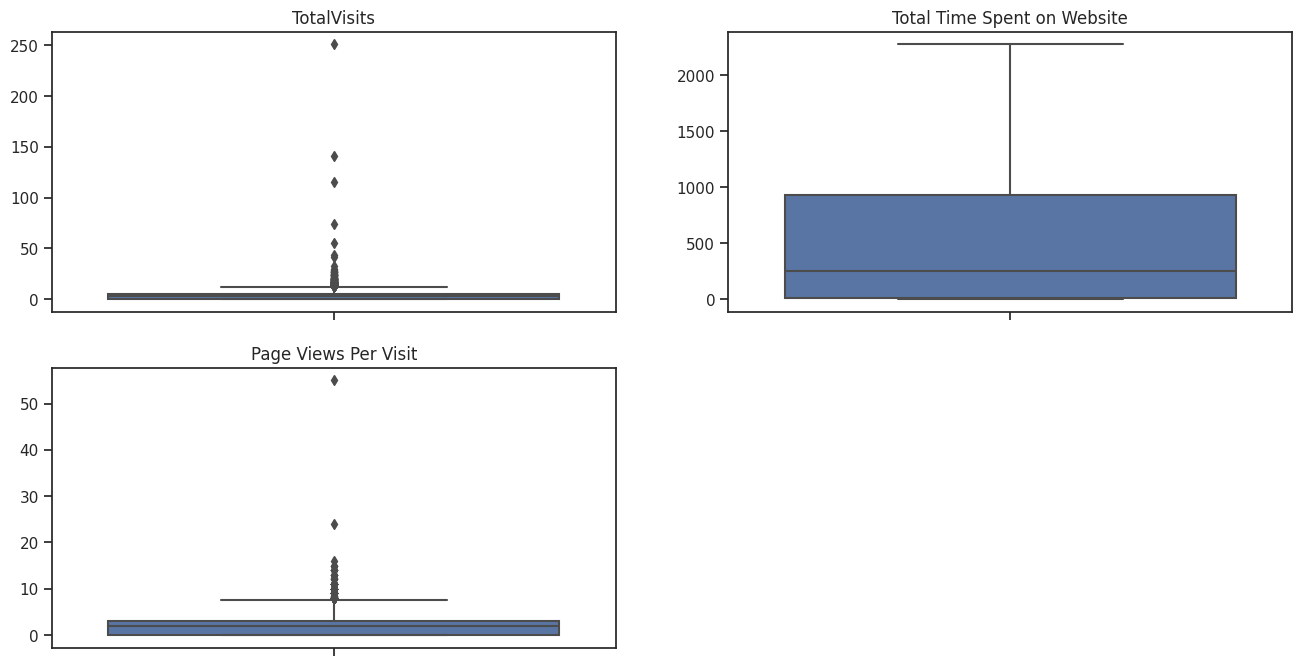

In [ ]:
i=1
plt.figure(figsize=[16,8])
for col in numerical_features_left:
    plt.subplot(2,2,i)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Insight:
*Though outliers in TotalVisits and Page Views Per Visit shows valid values, this will misclassify the outcomes and consequently create problems when making inferences with the wrong model. Logistic Regression is heavily influenced by outliers. So lets cap the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons:
Data set is fairly high number
95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the same*

In [ ]:
#Capping the data at 95% percentile value
q95 = X_train['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(X_train[X_train['TotalVisits'] >= q95]))
X_train.loc[X_train['TotalVisits'] >= q95, 'TotalVisits'] = q95# outlier capping
q95 = X_train['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(X_train[X_train['Page Views Per Visit'] >= q95]))
X_train.loc[X_train['Page Views Per Visit'] >= q95, 'Page Views Per Visit'] = q95 # outlier capping

Total number of rows getting capped for TotalVisits column :  337
Total number of rows getting capped for Page Views Per Visit column :  426


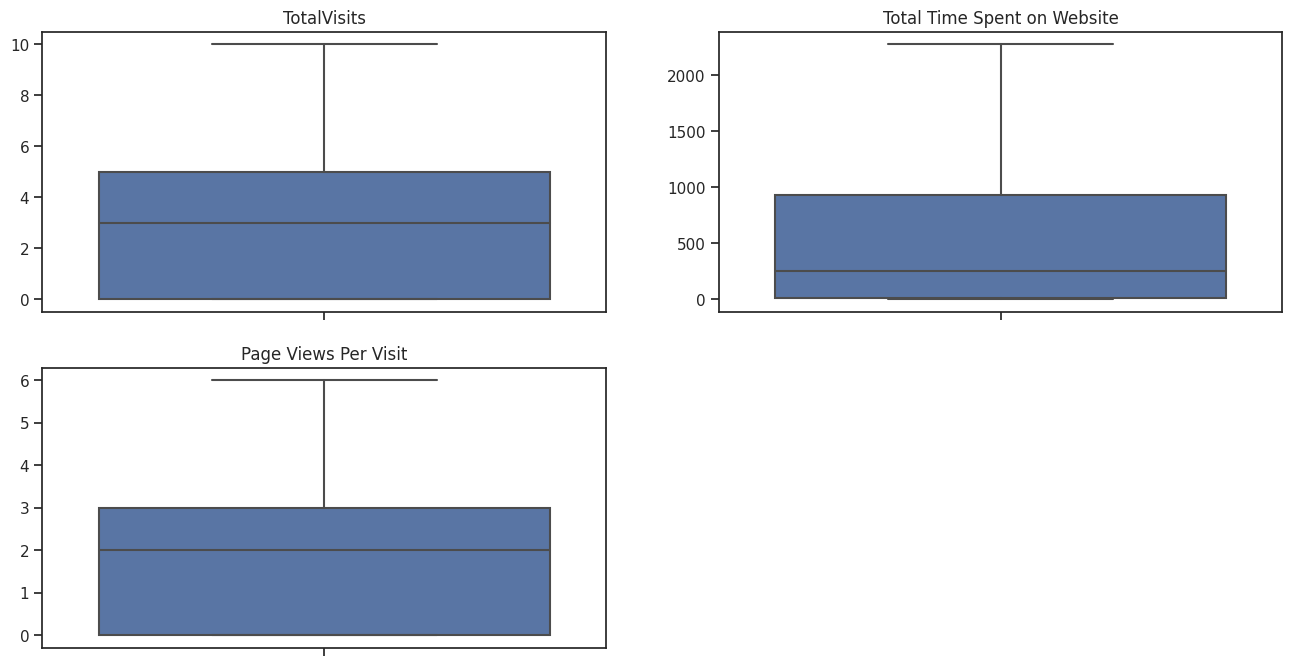

In [ ]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_features_left:
    plt.subplot(2,2,i)
    sns.boxplot(y=X_train[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [ ]:
results = {}

# Iterate over the numerical variables
for var in numerical_features_new:
    group1 = X_train[Y_train == 0][var]
    group2 = X_train[Y_train == 1][var]

    # Perform t-test for the current variable
    z_statistic, p_value = ztest(group1, group2, value=0)

    # Store the results in a dictionary
    results[var] = {'Z-Statistic': z_statistic, 'P-Value': p_value}

# Print the results
print("Z-Test Results:")
for var, result in results.items():
    print(var, "- Z-Statistic:", result['Z-Statistic'])
    print(var, "- P-Value:", result['P-Value'])

Z-Test Results:
TotalVisits - Z-Statistic: -2.1956880752571863
TotalVisits - P-Value: 0.02811427727095887
Total Time Spent on Website - Z-Statistic: -31.466713959028446
Total Time Spent on Website - P-Value: 2.479836036115137e-217
Page Views Per Visit - Z-Statistic: 1.738739951788647
Page Views Per Visit - P-Value: 0.08208051518833534


In [ ]:
cols_to_drop_cat

['How did you hear about X Education',
 'City',
 'What matters most to you in choosing a course',
 'Country',
 'Lead Profile',
 'Lead Quality',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Prospect ID',
 'Tags',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Do Not Call',
 'Through Recommendations',
 'Last Notable Activity',
 'Lead Origin']

### 6.2 Making changes to Testing data

In [ ]:
X_test.drop(cols_to_drop_cat, axis=1, inplace=True)

In [ ]:
X_test.drop(cols_to_drop_num, axis=1, inplace=True)

In [ ]:
X_test.head()

,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
4269,Direct Traffic,No,8.0,1011,8.0,SMS Sent,NaN,NaN,No
2376,Reference,No,0.0,0,0.0,SMS Sent,Select,Unemployed,No
7766,Google,No,5.0,59,5.0,Unreachable,Supply Chain Management,Working Professional,No
9199,Olark Chat,No,0.0,0,0.0,Olark Chat Conversation,Select,Unemployed,No
4359,Reference,No,0.0,0,0.0,Email Opened,Marketing Management,Unemployed,No


Now, these are the columns in X-test But we still have to make changes as this data is impure For example imputation of missing values, mapping of lead source values etc.

#### 6.2.1 Lead Source

In [ ]:
X_test['Lead Source'].replace(np.nan,'Google',inplace=True)
mapping_source = {'Welingak Website': 'Referral', 'Reference': 'Referral', 'WeLearn': 'Referral', 'Others': 'Others', 'Google': 'Search Engine', 'Organic Search': 'Search Engine', 'Direct Traffic': 'Direct Traffic', 'Referral Sites': 'Referral', 'Olark Chat': 'Olark Chat', 'Social channels': 'Social channels'}
X_test['Lead Source'] = X_test['Lead Source'].map(mapping_source).fillna(X_test['Lead Source'])

In [ ]:
X_test['Lead Source'].value_counts()

Search Engine     1205
Direct Traffic     787
Olark Chat         525
Referral           228
Facebook            22
bing                 3
testone              1
Click2call           1
Name: Lead Source, dtype: int64

#### 6.2.2 Total Visits

In [ ]:
X_test['TotalVisits'].fillna(0, inplace=True)

#### 6.2.3 Page Views per visit

In [ ]:
#Page Views Per Visit
X_test['Page Views Per Visit'].fillna(0, inplace=True)

#### 6.2.4 Specialization

In [ ]:
X_test['Specialization'].replace(np.NaN,"Unknown",inplace=True)
mapping_specialization = {'Healthcare Management': 'Healthcare Management', 'Rural and Agribusiness': 'Business', 'Banking, Investment And Insurance': 'Finance', 'Operations Management': 'Operations', 'Marketing Management': 'Marketing', 'Finance Management': 'Finance', 'Human Resource Management': 'Human Resource Management', 'Business Administration': 'Business', 'Media and Advertising': 'Media and Advertising', 'Supply Chain Management': 'Supply Chain Management', 'IT Projects Management': 'IT Projects Management', 'Retail Management': 'Retail Management', 'E-COMMERCE': 'Business', 'Hospitality Management': 'Hospitality Management', 'Travel and Tourism': 'Hospitality Management', 'E-Business': 'Business', 'International Business': 'Business', 'Services Excellence': 'Hospitality Management', 'Unknown': 'Unknown'  }
X_test['Specialization'] = X_test['Specialization'].map(mapping_specialization).fillna(X_test['Specialization'])

#### 6.2.5 Last Activity

In [ ]:
X_test['Last Activity'].replace(np.nan,'Email Opened', inplace=True)

In [ ]:
mapping_lastactivity = {'Email Marked Spam': 'Unsubscribed', 'Email Received': 'Email Interaction', 'Resubscribed to emails': 'Approached Upfront', 'Approached upfront': 'Approached Upfront', 'Had a Phone Conversation': 'Had a conversation', 'SMS Sent': 'SMS Sent', 'Email Opened': 'Email Interaction', 'Unreachable': 'Unreachable', 'Unsubscribed': 'Unsubscribed', 'Email Link Clicked': 'Email Interaction', 'Form Submitted on Website': 'Website Visit', 'Page Visited on Website': 'Website Visit', 'View in browser link Clicked': 'Website Visit', 'Converted to Lead': 'Converted to Lead', 'Email Bounced': 'Unreachable', 'Olark Chat Conversation': 'Had a conversation', 'Visited Booth in Tradeshow': 'Visited Booth in Tradeshow'}
X_test['Last Activity'] = X_test['Last Activity'].map(mapping_lastactivity).fillna(X_test['Last Activity'])

In [ ]:
X_test['Last Activity'].value_counts()

Email Interaction     1158
SMS Sent               802
Had a conversation     320
Website Visit          209
Converted to Lead      130
Unreachable            127
Unsubscribed            23
Approached Upfront       3
Name: Last Activity, dtype: int64

#### 6.2.6 Occupation

In [ ]:
X_test['What is your current occupation'].replace(np.nan,'Missing',inplace=True)
mapping_occupation = {'Housewife': 'Other', 'Businessman': 'Other', 'Working Professional': 'Working Professional', 'Unemployed': 'Unemployed', 'Student': 'Student', 'Missing': 'Missing'}
X_test['What is your current occupation'] = X_test['What is your current occupation'].map(mapping_occupation).fillna(X_test['What is your current occupation'])

# 7.MODEL BUILDING


### 7.1 Pipeline

In [ ]:
preprocessing = ColumnTransformer([
    ('scaling', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits']),
    ('one_hot_encoding', OneHotEncoder(handle_unknown='ignore'), ['Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation'])
])

# Define the binary mapping function
def binary_map(series):
    return series.map({'Yes': 1, "No": 0})

# Apply binary mapping to the specified columns
X_train['Do Not Email'] = binary_map(X_train['Do Not Email'])
X_train['A free copy of Mastering The Interview'] = binary_map(X_train['A free copy of Mastering The Interview'])

# Create the pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', LogisticRegression())
])
X_train_transformed = pipeline['preprocessing'].fit_transform(X_train, Y_train)

X_test_transformed = pipeline['preprocessing'].transform(X_test)

Y_train_pred=pipeline['model'].fit(X_train_transformed, Y_train)

Y_pred = pipeline['model'].predict(X_test_transformed)

### 7.2 Model Evaluation


On Training Data:

In [ ]:

Y_train_prob = pipeline['model'].predict_proba(X_train_transformed)

threshold = 0.5

Y_train_pred_custom = (Y_train_prob[:, 1] >= threshold).astype(int)

# Compare custom predicted values with actual values
comparison_custom = pd.DataFrame({'Actual': Y_train, 'Predicted': Y_train_pred_custom})
print(comparison_custom)

# Calculate accuracy and recall (sensitivity) for custom threshold
accuracy_custom = metrics.accuracy_score(Y_train, Y_train_pred_custom)
recall_custom = metrics.recall_score(Y_train, Y_train_pred_custom)
precision_custom = metrics.precision_score(Y_train, Y_train_pred_custom)
print("Accuracy :", accuracy_custom)
print("Recall (Sensitivity) :", recall_custom)
print("Precision:",precision_custom)

      Actual  Predicted
1871       0          0
6795       0          0
3516       0          0
8105       0          1
3934       0          0
...      ...        ...
350        1          0
79         1          1
8039       1          0
6936       0          0
5640       0          0

[6468 rows x 2 columns]
Accuracy : 0.8123067408781695
Recall (Sensitivity) : 0.7031630170316302
Precision: 0.7824909747292419


On Testing Data:

In [ ]:

Y_prob = pipeline['model'].predict_proba(X_test_transformed)

threshold = 0.5

Y_pred_custom = (Y_prob[:, 1] >= threshold).astype(int)

# Compare custom predicted values with actual values
comparison_custom = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_custom})
print(comparison_custom)

# Calculate accuracy and recall (sensitivity) for custom threshold
accuracy_testing = metrics.accuracy_score(Y_test, Y_pred_custom)
recall_testing = metrics.recall_score(Y_test, Y_pred_custom)
precision_testing=metrics.precision_score(Y_test, Y_pred_custom)
print("Accuracy :", accuracy_testing)
print("Recall (Sensitivity) :", recall_testing)
print("Precision :",precision_testing)

      Actual  Predicted
4269       1          0
2376       1          1
7766       1          0
9199       0          0
4359       1          1
...      ...        ...
8649       0          0
2152       1          0
7101       0          0
5331       0          0
2960       1          1

[2772 rows x 2 columns]
Accuracy : 0.8037518037518038
Recall (Sensitivity) : 0.6894977168949772
Precision : 0.7872784150156413


We will want to minimize “false negatives” (a model incorrectly predicting a lead won’t become a customer), to ensure that good leads for the sales team don’t slip through the cracks and get de-prioritized or ignored. We’d consider the costs of missing out on a potential customer much higher than the associated costs of trying to prospect a non-qualified customer. Therefore, we want to focus on improving the recall of our lead scoring model. To do so, we’ll slightly reduce the classification threshold from its original position in the first model which will classify more leads as customers, thus increasing both false positives and true positives. Instead of the default threshold of 0.5, we will see the table of different values of metrics at different thresholds.

In [ ]:

thresholds = []
accuracies = []
recalls = []
precisions = []

# Specify the interval between thresholds
threshold_interval = 0.05

# Iterate over the range of thresholds
for threshold in np.arange(0, 1 + threshold_interval, threshold_interval):

    # Create new predictions based on the current threshold
    Y_pred_custom = (Y_prob[:, 1] >= threshold).astype(int)

    # Calculate accuracy, recall (sensitivity), and precision for the current threshold
    accuracy_custom = metrics.accuracy_score(Y_test, Y_pred_custom)
    recall_custom = metrics.recall_score(Y_test, Y_pred_custom)
    precision_custom = metrics.precision_score(Y_test, Y_pred_custom)

    # Append values to respective lists
    thresholds.append(threshold)
    accuracies.append(accuracy_custom)
    recalls.append(recall_custom)
    precisions.append(precision_custom)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Threshold': thresholds, 'Accuracy': accuracies, 'Recall': recalls, 'Precision': precisions})

# Print the results table
print(results_df)


    Threshold  Accuracy    Recall  Precision
0        0.00  0.395022  1.000000   0.395022
1        0.05  0.521284  0.992694   0.451787
2        0.10  0.609307  0.977169   0.502820
3        0.15  0.689755  0.958904   0.563003
4        0.20  0.744949  0.928767   0.617861
5        0.25  0.769120  0.905936   0.648790
6        0.30  0.778860  0.866667   0.670198
7        0.35  0.790043  0.833790   0.695354
8        0.40  0.800505  0.765297   0.738977
9        0.45  0.805556  0.729680   0.766795
10       0.50  0.803752  0.689498   0.787278
11       0.55  0.798341  0.648402   0.803167
12       0.60  0.793651  0.616438   0.816203
13       0.65  0.786436  0.576256   0.831357
14       0.70  0.766595  0.494064   0.853312
15       0.75  0.743867  0.415525   0.866667
16       0.80  0.725108  0.354338   0.875847
17       0.85  0.714286  0.312329   0.897638
18       0.90  0.682179  0.213699   0.921260
19       0.95  0.651876  0.125114   0.951389
20       1.00  0.604978  0.000000   0.000000


On setting the default to 0.3, we are getting a good recall with reasonable precision and accuracy



In [ ]:
# Choose the desired fixed threshold value
fixed_threshold = 0.3

# Check if the fixed threshold exists in the thresholds list
if any(abs(threshold - fixed_threshold) < 1e-8 for threshold in thresholds):
    # Find the index of the closest threshold value to the desired fixed threshold
    closest_threshold_index = min(range(len(thresholds)), key=lambda i: abs(thresholds[i] - fixed_threshold))


    Y_pred_fixed = (Y_prob[:, 1] >= fixed_threshold).astype(int)
    accuracy_fixed = accuracies[closest_threshold_index]
    recall_fixed = recalls[closest_threshold_index]
    precision_fixed = precisions[closest_threshold_index]
    f1_score_fixed = metrics.f1_score(Y_test, Y_pred_fixed)

    # Print the fixed threshold and corresponding evaluation metrics
    print("Fixed Threshold:", fixed_threshold)
    print("Accuracy :", accuracy_fixed)
    print("Recall :", recall_fixed)
    print("Precision :", precision_fixed)
    print("F1-score:", f1_score_fixed)
else:
    print("Fixed threshold does not exist in the thresholds list.")


Fixed Threshold: 0.3
Accuracy : 0.7788600288600288
Recall : 0.8666666666666667
Precision : 0.6701977401129944
F1-score: 0.7558741537236161


In [ ]:
pipeline['model'].coef_

array([[ 1.03381381e+00, -5.50210246e-01,  2.83267044e-01,
        -1.05108497e+00,  3.12233922e-01,  4.53410384e-01,
         1.70783683e+00, -4.54908338e-01, -9.61654203e-01,
         1.56886768e+00, -1.09169201e+00,  3.21741416e-01,
        -8.37304590e-01,  1.48989159e+00, -9.54927172e-01,
         6.45014147e-02, -1.20984730e-01, -4.34259966e-01,
        -1.77476385e-02,  2.62269562e-01,  3.45247102e-01,
        -2.56796522e-01,  2.89298019e-02,  2.01342924e-01,
         7.17011776e-02,  9.53005608e-02, -9.75617049e-04,
        -3.42580919e-01,  3.58609059e-02, -4.16717707e-01,
        -1.67181029e+00,  4.24555461e-01, -3.11587817e-01,
        -4.46711903e-01,  2.01138818e+00]])

In [ ]:
X_train.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'Lead Source_Referral',
       'Lead Source_Search Engine', 'Lead Source_Social channels',
       'Last Activity_Approached Upfront', 'Last Activity_Converted to Lead',
       'Last Activity_Email Interaction', 'Last Activity_Had a conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_Visited Booth in Tradeshow',
       'Last Activity_Website Visit', 'Specialization_Business',
       'Specialization_Finance', 'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management', 'Specialization_Marketing',
       'Specialization_Media and Advertising', 'Speciali

# END

## 7.3 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}

# Create logistic regression model
logistic_regression = LogisticRegression()

# Perform grid search
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, Y_train)

# Get best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use best model for predictions
best_model = grid_search.best_estimator_
Y_pred_prob = best_model.predict_proba(X_test_transformed)[:, 1]
Y_pred = (Y_pred_prob >= 0.3).astype(int)

# Calculate evaluation metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
recall = metrics.recall_score(Y_test, Y_pred)
precision = metrics.precision_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.7777777777777778
Recall: 0.8721461187214612
Precision: 0.6673654786862334


As we can see there is a little improvement on the model of hyperparameter tuning, We'd rather not use it.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()


,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
1871,Olark Chat,0,-1.121955,-0.885371,-1.234699,Email Interaction,Marketing,Unemployed,0
6795,Direct Traffic,0,0.313260,0.005716,-0.493295,Email Interaction,Unknown,Unemployed,1
3516,Olark Chat,0,0.672063,-0.691418,0.158918,Email Interaction,Unknown,Unemployed,0
8105,Search Engine,0,0.672063,1.365219,1.552535,SMS Sent,Hospitality Management,Unemployed,0
3934,Olark Chat,0,-1.121955,-0.885371,-1.234699,Email Interaction,Unknown,Unemployed,0


In [ ]:
X_train.nunique().sort_values()

Do Not Email                                 2
A free copy of Mastering The Interview       2
What is your current occupation              5
Lead Source                                  6
Last Activity                                9
TotalVisits                                 11
Specialization                              12
Page Views Per Visit                        82
Total Time Spent on Website               1567
dtype: int64

There are 2 unique values in two columns i.e.**Do Not Email** and **A free copy of mastering the interview**.We know both of them are categorical and have values as 'Yes' or 'No' . Let's convert the values to 0 and 1

In [ ]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
X_train['Do Not Email'] = X_train[['Do Not Email']].apply(binary_map)
X_train['A free copy of Mastering The Interview']=X_train[['A free copy of Mastering The Interview']].apply(binary_map)


In [ ]:
X_train['Do Not Email'].value_counts()

Series([], Name: Do Not Email, dtype: int64)

In [ ]:
X_train['A free copy of Mastering The Interview'].value_counts()

Series([], Name: A free copy of Mastering The Interview, dtype: int64)

Let's convert the variables with more than two categories now which can be done by creating **dummy variables**

In [ ]:
cols_to_encode=['Lead Source','Last Activity','Specialization','What is your current occupation']

In [ ]:
one_hot_encoded = pd.get_dummies(X_train[cols_to_encode])

In [ ]:
X_train= pd.concat([X_train, one_hot_encoded], axis=1)
X_train.head()


,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Referral,Lead Source_Search Engine,Lead Source_Social channels,Last Activity_Approached Upfront,Last Activity_Converted to Lead,Last Activity_Email Interaction,Last Activity_Had a conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Last Activity_Website Visit,Specialization_Business,Specialization_Finance,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Unknown,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,Olark Chat,NaN,-1.121955,-0.885371,-1.234699,Email Interaction,Marketing,Unemployed,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6795,Direct Traffic,NaN,0.313260,0.005716,-0.493295,Email Interaction,Unknown,Unemployed,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3516,Olark Chat,NaN,0.672063,-0.691418,0.158918,Email Interaction,Unknown,Unemployed,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8105,Search Engine,NaN,0.672063,1.365219,1.552535,SMS Sent,Hospitality Management,Unemployed,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3934,Olark Chat,NaN,-1.121955,-0.885371,-1.234699,Email Interaction,Unknown,Unemployed,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


We have created dummies for the below variables, so we can drop them


In [ ]:
X_train = X_train.drop(cols_to_encode, axis=1)


In [ ]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Others,Lead Source_Referral,Lead Source_Search Engine,Lead Source_Social channels,Last Activity_Approached Upfront,Last Activity_Converted to Lead,Last Activity_Email Interaction,Last Activity_Had a conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_Visited Booth in Tradeshow,Last Activity_Website Visit,Specialization_Business,Specialization_Finance,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing,Specialization_Media and Advertising,Specialization_Operations,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Unknown,What is your current occupation_Missing,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1871,NaN,-1.121955,-0.885371,-1.234699,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6795,NaN,0.313260,0.005716,-0.493295,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3516,NaN,0.672063,-0.691418,0.158918,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
8105,NaN,0.672063,1.365219,1.552535,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3934,NaN,-1.121955,-0.885371,-1.234699,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          0 non-null      float64
 1   TotalVisits                                           6468 non-null   float64
 2   Total Time Spent on Website                           6468 non-null   float64
 3   Page Views Per Visit                                  6468 non-null   float64
 4   A free copy of Mastering The Interview                0 non-null      float64
 5   Lead Source_Direct Traffic                            6468 non-null   uint8  
 6   Lead Source_Olark Chat                                6468 non-null   uint8  
 7   Lead Source_Others                                    6468 non-null   uint8  
 8   Lead Source_Referral                                  6

There are **37** columns in the data set after creating dummy variables

In [ ]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


In [ ]:
logreg = LogisticRegression()
X_train_sm = sm.add_constant(X_train)
logreg.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
Y_train_pred_prob = model.predict_proba(X_train)
Y_train_pred_prob[:10]

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
Y_train_pred = np.argmax(Y_train_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_train, Y_train_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y_train, Y_train_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(Y_train, Y_train_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(Y_train, Y_train_pred)
print("F1 score:", f1)

# Extract the predicted probabilities for the positive class
Y_train_pred_prob_positive = Y_train_pred_prob[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_train, Y_train_pred_prob_positive)
print("ROC AUC score:", roc_auc)

In [ ]:
thresholds = np.arange(0, 1, 0.05)
accuracy_list = []
precision_list = []
recall_list = []

# Iterate over each threshold
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    Y_train_pred_binary = np.where(Y_train_pred_prob[:, 1] > threshold, 1, 0)

    # Calculate accuracy, precision, and recall
    accuracy = accuracy_score(Y_train, Y_train_pred_binary)
    precision = precision_score(Y_train, Y_train_pred_binary)
    recall = recall_score(Y_train, Y_train_pred_binary)

    # Append the results to the respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)

# Create a DataFrame to store the results
results = pd.DataFrame({'Threshold': thresholds,
                        'Accuracy': accuracy_list,
                        'Precision': precision_list,
                        'Recall': recall_list})

# Display the results table
print(results)

In [ ]:
# Set the fixed threshold
fixed_threshold = 0.35

# Convert predicted probabilities to predicted labels based on the fixed threshold
Y_train_predicted = np.where(Y_train_pred_prob[:, 1] > fixed_threshold, 1, 0)


Y_train_predicted will be the final predicted values with threshold 0.35

In [ ]:
Y_train_predicted

In [ ]:
confusion_mat = confusion_matrix(Y_train, Y_train_predicted)
print("Confusion Matrix:")
print(confusion_mat)